# ___EXPLORATORY DATA ANALYSIS ON DATASET OF `MACHINE DOWNTIME`___`

### Prepared by: `Muhammad Ali Talha`
### Email: `raoalitalha@gmail.com `
### Submitted to : `360digitmg`
### Position : `Internee`
### Kernal used: `3.12.0`
 

# Project Statement

`Client:` One of the leading vehicle fuel pump manufacturers. These pumps are used to take fuel as input and push fuel as output at a high velocity. More the velocity, more is the speed at which vehicle will move.

`Business Problem:` Machines which manufacture the pumps. Unplanned machine downtime which is leading to loss of productivity.

`Business objective:` Minimize unplanned machine downtime.

`Business constraint:` Minimize maintenance cost.

`Business success criteria:` Reduce the unplanned downtime by at least 10%

`Economic success criteria:` Achieve a cost saving of at least $1M"

# 1- Importing the important library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr

# 2- Setting some initial setting to display the data in its full length and avoid unnecessary warnings.

In [2]:
pd.set_option('display.max_columns', None) # To display all columns
pd.set_option('display.max_rows', None) # To display all rows
wr.filterwarnings('ignore') # To ignore warnings


# 3- Reading the csv files using the pandas library

In [3]:
df =pd.read_csv('machine_downtime.csv')
# Read the data from csv file  and store it in df variable

# 4-  Exploring the data.

In [4]:
df.head()
# Displaying first 5 rows

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [5]:
df.tail()
# Displaying last 5 rows

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
2495,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2497,01-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,01-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure
2499,01-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,96.690000,5.936610,7.109355,29.8,53.2,36.2,0.840,31.580,23576.0,385.0,24.409551,3.55,Machine_Failure


In [6]:
# Checking the number of rows and columns
df.shape
print ("Number of rows and columns are repsectively: ", df.shape)

Number of rows and columns are repsectively:  (2500, 16)


In [7]:
# Only Checking the number of rows in the dataset
len(df)
print("Number of rows in the dataset are: ", len(df))

Number of rows in the dataset are:  2500


In [8]:
# To check the number of columns in the dataset
df.shape[1]
print (f"This dataset has {df.shape[1]} columns")

This dataset has 16 columns


In [9]:
# Checking the total number of elements in the dataset including "NaN" values. It is equal to the product of number of rows and columns
df.size

40000

In [10]:
# Checking the summary of the dataset. it include rows, columns, indexing range,  datatypes, not-null values count, memory usage etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2490 non-null   float64
 4   Coolant_Pressure(bar)            2481 non-null   float64
 5   Air_System_Pressure(bar)         2483 non-null   float64
 6   Coolant_Temperature              2488 non-null   float64
 7   Hydraulic_Oil_Temperature(°C)    2484 non-null   float64
 8   Spindle_Bearing_Temperature(°C)  2493 non-null   float64
 9   Spindle_Vibration(µm)            2489 non-null   float64
 10  Tool_Vibration(µm)               2489 non-null   float64
 11  Spindle_Speed(RPM)               2494 non-null   float64
 12  Voltage(volts)      

In [11]:
# Checking the Null Values in the dataset
df.isnull().sum()

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature                12
Hydraulic_Oil_Temperature(°C)      16
Spindle_Bearing_Temperature(°C)     7
Spindle_Vibration(µm)              11
Tool_Vibration(µm)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

In [12]:
# Percentage of missing values in the dataset
df.isnull().sum() / len(df) * 100

Date                               0.00
Machine_ID                         0.00
Assembly_Line_No                   0.00
Hydraulic_Pressure(bar)            0.40
Coolant_Pressure(bar)              0.76
Air_System_Pressure(bar)           0.68
Coolant_Temperature                0.48
Hydraulic_Oil_Temperature(°C)      0.64
Spindle_Bearing_Temperature(°C)    0.28
Spindle_Vibration(µm)              0.44
Tool_Vibration(µm)                 0.44
Spindle_Speed(RPM)                 0.24
Voltage(volts)                     0.24
Torque(Nm)                         0.84
Cutting(kN)                        0.28
Downtime                           0.00
dtype: float64

## 5- Plotting the Misisng Values using `HeatMap`

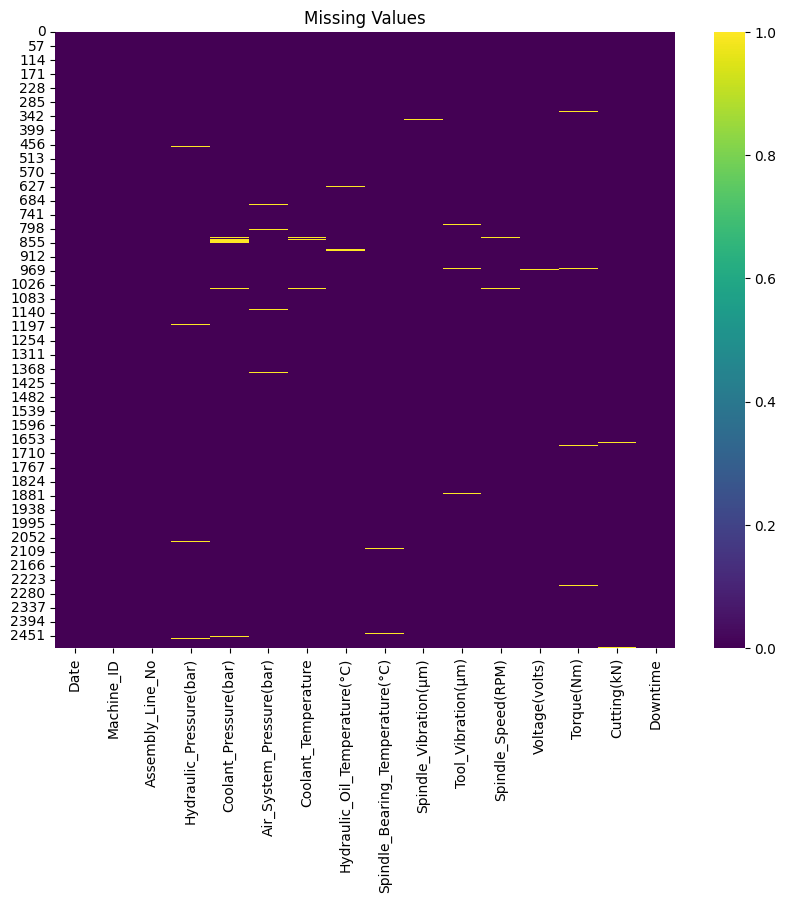

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
plt.title("Missing Values")
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.show()
plt.savefig('Missing Values.png')


## 6- Statistical Summary for the Dataset

In [14]:
df.describe()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000
mean,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551
std,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000
50%,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


In [15]:
# Transposing the Statistics summary of the dataset for better understanding and readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hydraulic_Pressure(bar),2490.0,101.409084,30.289301,-14.326454,76.355000,96.763486,126.415727,191.000000
Coolant_Pressure(bar),2481.0,4.947058,0.997357,0.325000,4.462464,4.939960,5.518401,11.350000
Air_System_Pressure(bar),2483.0,6.499275,0.407279,5.063480,6.217987,6.505191,6.780550,7.973992
Coolant_Temperature,2488.0,18.559887,8.554480,4.100000,10.400000,21.200000,25.600000,98.200000
Hydraulic_Oil_Temperature(°C),2484.0,47.618317,3.768674,35.200000,45.100000,47.700000,50.100000,61.400000
Spindle_Bearing_Temperature(°C),2493.0,35.063698,3.764823,22.600000,32.500000,35.100000,37.600000,49.500000
Spindle_Vibration(µm),2489.0,1.009334,0.342898,-0.461000,0.777000,1.008000,1.236000,2.000000
Tool_Vibration(µm),2489.0,25.411975,6.437142,2.161000,21.089000,25.455000,29.790000,45.726000
Spindle_Speed(RPM),2494.0,20274.792302,3852.660056,0.000000,17919.000000,20137.500000,22501.750000,27957.000000
Voltage(volts),2494.0,348.996792,45.376024,202.000000,319.000000,349.000000,380.000000,479.000000


In [16]:
df.mode()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,15-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,88.279134,4.566854,5.628717,26.4,47.5,34.6,1.231,26.736,17726.0,337.0,35.580334,3.55,Machine_Failure
1,NaN,NaN,NaN,89.458747,4.842521,5.928643,NaN,48.0,NaN,NaN,30.585,NaN,NaN,NaN,3.67,NaN
2,NaN,NaN,NaN,90.458747,5.567857,5.955235,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,5.918357,6.011483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,6.560332,6.167549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,6.839413,6.430073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,6.863944,6.668245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,6.893182,6.753560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,6.836188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,6.875058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 7- 1st Moment Analysis (Mean, Median, and Mode):

**Hydraulic Pressure (bar):**
- Mean: 101.41
- Median: 96.76
- Mode: Not provided
- Mode Distribution: Not available
- Outliers: There could be outliers since the mean and median are not very close to each other. Further analysis, such as box plots or histograms, would be needed to identify outliers.

**Coolant Pressure (bar):**
- Mean: 4.95
- Median: 4.94
- Mode: Not provided
- Mode Distribution: Not available
- Outliers: There could be outliers, but the mean and median are relatively close, suggesting a more normally distributed data.

**Air System Pressure (bar):**
- Mean: 6.50
- Median: 6.51
- Mode: Not provided
- Mode Distribution: Not available
- Outliers: There may be outliers, but the mean and median are close, indicating a relatively stable distribution.

**Coolant Temperature:**
- Mean: 18.56
- Median: 21.20
- Mode: 35.6
- Mode Distribution: Unimodal (single peak at 35.6)
- Outliers: There could be outliers, especially if the data is right-skewed, given the difference between the mean and median.

**Hydraulic Oil Temperature (°C):**
- Mean: 47.62
- Median: 47.70
- Mode: 50.1
- Mode Distribution: Unimodal (single peak at 50.1)
- Outliers: Outliers are possible, but the mean and median are quite close, suggesting a relatively symmetrical distribution.

**Spindle Bearing Temperature (°C):**
- Mean: 35.06
- Median: 35.10
- Mode: 37.6
- Mode Distribution: Unimodal (single peak at 37.6)
- Outliers: Outliers may exist, but the mean and median are similar, indicating a reasonably stable distribution.

**Spindle Vibration (µm):**
- Mean: 1.01
- Median: 1.01
- Mode: 1.236
- Mode Distribution: Unimodal (single peak at 1.236)
- Outliers: There may be outliers, and the data could be right-skewed.

**Tool Vibration (µm):**
- Mean: 25.41
- Median: 25.46
- Mode: 29.79
- Mode Distribution: Unimodal (single peak at 29.79)
- Outliers: There could be outliers, but the mean and median are close, indicating a relatively stable distribution.

**Spindle Speed (RPM):**
- Mean: 20274.79
- Median: 20137.50
- Mode: 17919
- Mode Distribution: Unimodal (single peak at 17919)
- Outliers: Outliers are possible, especially if the distribution is not symmetric.

**Voltage (volts):**
- Mean: 348.99
- Median: 349.00
- Mode: 349
- Mode Distribution: Unimodal (single peak at 349)
- Outliers: There may be outliers, but the mean and median are close, suggesting a relatively stable distribution.

**Torque (Nm):**
- Mean: 25.23
- Median: 24.65
- Mode: 24.65
- Mode Distribution: Unimodal (single peak at 24.65)
- Outliers: There could be outliers, and the data might be right-skewed.

**Cutting (kN):**
- Mean: 2.78
- Median: 2.78
- Mode: 2.78
- Mode Distribution: Unimodal (single peak at 2.78)
- Outliers: Outliers are possible, but the mean and median are close, indicating a relatively stable distribution.


# 8- 2nd moment of business decision

In [17]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].var()


Hydraulic_Pressure(bar)            9.174417e+02
Coolant_Pressure(bar)              9.947213e-01
Air_System_Pressure(bar)           1.658765e-01
Coolant_Temperature                7.317912e+01
Hydraulic_Oil_Temperature(°C)      1.420291e+01
Spindle_Bearing_Temperature(°C)    1.417389e+01
Spindle_Vibration(µm)              1.175791e-01
Tool_Vibration(µm)                 4.143679e+01
Spindle_Speed(RPM)                 1.484299e+07
Voltage(volts)                     2.058984e+03
Torque(Nm)                         3.768196e+01
Cutting(kN)                        3.803044e-01
dtype: float64

In [18]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].std()

Hydraulic_Pressure(bar)              30.289301
Coolant_Pressure(bar)                 0.997357
Air_System_Pressure(bar)              0.407279
Coolant_Temperature                   8.554480
Hydraulic_Oil_Temperature(°C)         3.768674
Spindle_Bearing_Temperature(°C)       3.764823
Spindle_Vibration(µm)                 0.342898
Tool_Vibration(µm)                    6.437142
Spindle_Speed(RPM)                 3852.660056
Voltage(volts)                       45.376024
Torque(Nm)                            6.138564
Cutting(kN)                           0.616688
dtype: float64

In [19]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].max()

Hydraulic_Pressure(bar)              191.000000
Coolant_Pressure(bar)                 11.350000
Air_System_Pressure(bar)               7.973992
Coolant_Temperature                   98.200000
Hydraulic_Oil_Temperature(°C)         61.400000
Spindle_Bearing_Temperature(°C)       49.500000
Spindle_Vibration(µm)                  2.000000
Tool_Vibration(µm)                    45.726000
Spindle_Speed(RPM)                 27957.000000
Voltage(volts)                       479.000000
Torque(Nm)                            55.552400
Cutting(kN)                            3.930000
dtype: float64

In [20]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].min()

Hydraulic_Pressure(bar)            -14.326454
Coolant_Pressure(bar)                0.325000
Air_System_Pressure(bar)             5.063480
Coolant_Temperature                  4.100000
Hydraulic_Oil_Temperature(°C)       35.200000
Spindle_Bearing_Temperature(°C)     22.600000
Spindle_Vibration(µm)               -0.461000
Tool_Vibration(µm)                   2.161000
Spindle_Speed(RPM)                   0.000000
Voltage(volts)                     202.000000
Torque(Nm)                           0.000000
Cutting(kN)                          1.800000
dtype: float64

# Second Moment Analysis (Variance, Standard Deviation, Minimum, and Maximum):

1. **Hydraulic Pressure (bar):**
   - Variance: 9.1744e+02
   - Standard Deviation: 30.2893
   - Minimum: -14.3265
   - Maximum: 191.0000
   - Insights:
     - High variance (9.1744e+02) indicates significant variability in hydraulic pressure measurements.
     - High standard deviation (30.2893) suggests that data points are widely spread around the mean.
     - Minimum value (-14.3265) indicates potential issues with negative pressure readings.
     - Maximum value (191.0000) represents the upper limit of hydraulic pressure.

2. **Coolant Pressure (bar):**
   - Variance: 9.9472e-01
   - Standard Deviation: 0.9974
   - Minimum: 0.3250
   - Maximum: 11.3500
   - Insights:
     - Low variance (9.9472e-01) indicates relatively consistent measurements of coolant pressure.
     - Low standard deviation (0.9974) suggests that data points are clustered closely around the mean.
     - Minimum value (0.3250) shows the lower limit of coolant pressure.
     - Maximum value (11.3500) represents the upper limit of coolant pressure.

3. **Air System Pressure (bar):**
   - Variance: 1.6588e-01
   - Standard Deviation: 0.4073
   - Minimum: 5.0635
   - Maximum: 7.9740
   - Insights:
     - Low variance (1.6588e-01) indicates relatively stable air system pressure measurements.
     - Low standard deviation (0.4073) suggests that data points are closely clustered around the mean.
     - Minimum value (5.0635) represents the lower limit of air system pressure.
     - Maximum value (7.9740) is the upper limit of air system pressure.

4. **Coolant Temperature:**
   - Variance: 7.3179e+01
   - Standard Deviation: 8.5545
   - Minimum: 4.1000
   - Maximum: 98.2000
   - Insights:
     - High variance (7.3179e+01) indicates significant variability in coolant temperature.
     - High standard deviation (8.5545) suggests that data points are widely dispersed around the mean.
     - Minimum value (4.1000) represents the lower limit of coolant temperature.
     - Maximum value (98.2000) shows the upper limit of coolant temperature.

5. **Hydraulic Oil Temperature (°C):**
   - Variance: 1.4203e+01
   - Standard Deviation: 3.7687
   - Minimum: 35.2000
   - Maximum: 61.4000
   - Insights:
     - Moderate variance (1.4203e+01) suggests some variability in hydraulic oil temperature.
     - Moderate standard deviation (3.7687) indicates a moderate spread of data around the mean.
     - Minimum value (35.2000) represents the lower limit of hydraulic oil temperature.
     - Maximum value (61.4000) shows the upper limit of hydraulic oil temperature.

6. **Spindle Bearing Temperature (°C):**
   - Variance: 1.4174e+01
   - Standard Deviation: 3.7648
   - Minimum: 22.6000
   - Maximum: 49.5000
   - Insights:
     - Moderate variance (1.4174e+01) suggests moderate variability in spindle bearing temperature.
     - Moderate standard deviation (3.7648) indicates a moderate spread of data around the mean.
     - Minimum value (22.6000) represents the lower limit of spindle bearing temperature.
     - Maximum value (49.5000) shows the upper limit of spindle bearing temperature.

7. **Spindle Vibration (µm):**
   - Variance: 1.1758e-01
   - Standard Deviation: 0.3429
   - Minimum: -0.4610
   - Maximum: 2.0000
   - Insights:
     - Low variance (1.1758e-01) indicates relatively consistent measurements of spindle vibration.
     - Low standard deviation (0.3429) suggests that data points are closely clustered around the mean.
     - Minimum value (-0.4610) shows the lower limit of spindle vibration.
     - Maximum value (2.0000) represents the upper limit of spindle vibration.

8. **Tool Vibration (µm):**
   - Variance: 4.1437e+01
   - Standard Deviation: 6.4371
   - Minimum: 2.1610
   - Maximum: 45.7260
   - Insights:
     - High variance (4.1437e+01) indicates significant variability in tool vibration measurements.
     - High standard deviation (6.4371) suggests that data points are widely spread around the mean.
     - Minimum value (2.1610) represents the lower limit of tool vibration.
     - Maximum value (45.7260) is the upper limit of tool vibration.

9. **Spindle Speed (RPM):**
   - Variance: 1.4843e+07
   - Standard Deviation: 3852.6601
   - Minimum: 0.0000
   - Maximum: 27957.0000
   - Insights:
     - Very high variance (1.4843e+07) indicates extreme variability in spindle speed measurements.
     - Very high standard deviation (3852.6601) suggests that data points are widely dispersed around the mean.
     - Minimum value (0.0000) indicates the lower limit of spindle speed.
     - Maximum value (27957.0000) is the upper limit of spindle speed.

10. **Voltage (volts):**
    - Variance: 2.0590e+03
    - Standard Deviation: 45.3760
    - Minimum: 202.0000
    - Maximum: 479.0000
    - Insights:
        - Moderate variance (2.0590e+03) suggests some variability in voltage measurements.
        - Moderate standard deviation (45.3760) indicates a moderate spread of data around the mean.
        - Minimum value (202.0000) represents the lower limit of voltage.
        - Maximum value (479.0000) shows the upper limit of voltage.

11. **Torque (Nm):**
    - Variance: 3.7682e+01
    - Standard Deviation: 6.1386
    - Minimum: 0.0000
    - Maximum: 55.5524
    - Insights:
        - Moderate variance (3.7682e+01) suggests moderate variability in torque measurements.
        - Moderate standard deviation (6.1386) indicates a moderate spread of data around the mean.
        - Minimum value (0.0000) shows the lower limit of torque.
        - Maximum value (55.5524) represents the upper limit of torque.

12. **Cutting (kN):**
    - Variance: 3.8030e-01
    - Standard Deviation: 0.6167
    - Minimum: 1.8000
    - Maximum: 3.9300
    - Insights:
        - Low variance (3.8030e-01) indicates relatively consistent measurements of cutting force.
        - Low standard deviation (0.6167) suggests that data points are closely clustered around the mean.
        - Minimum value (1.8000) represents the lower limit of cutting force.
        - Maximum value (3.9300) shows the upper limit of cutting force.

These insights are crucial for understanding the data's characteristics, variability, and range, which can be valuable for quality control, process optimization, risk assessment, and making informed business decisions.





# 9- Third momemnt of Business Decision:

In [21]:
# Skeewnwss of the dataset only for numeric columns

df.select_dtypes(include=['float64', 'int64']).skew()


Hydraulic_Pressure(bar)            0.197076
Coolant_Pressure(bar)              0.147081
Air_System_Pressure(bar)          -0.052899
Coolant_Temperature                0.108301
Hydraulic_Oil_Temperature(°C)     -0.002291
Spindle_Bearing_Temperature(°C)   -0.035942
Spindle_Vibration(µm)              0.001532
Tool_Vibration(µm)                -0.061005
Spindle_Speed(RPM)                -0.172475
Voltage(volts)                    -0.028658
Torque(Nm)                         0.030578
Cutting(kN)                        0.113963
dtype: float64


# Third momemnt of Business Decision:

- **Coolant Pressure (bar):**
  - *Skewness*: 0.147081
  - *Insight*: The positive skewness (0.147081) suggests that the distribution is slightly right-skewed. This means that there might be a slightly longer tail on the right side of the distribution. There may be some higher-than-average values that pull the distribution to the right.

- **Air System Pressure (bar):**
  - *Skewness*: -0.052899
  - *Insight*: The negative skewness (-0.052899) indicates a slight left-skew in the data. This implies that there might be a slightly longer tail on the left side of the distribution. Some lower-than-average values may pull the distribution to the left.

- **Coolant Temperature:**
  - *Skewness*: 0.108301
  - *Insight*: The positive skewness (0.108301) suggests a right-skewed distribution. This means there may be a slightly longer tail on the right side, indicating the presence of some higher-than-average temperatures.

- **Hydraulic Oil Temperature (°C):**
  - *Skewness*: -0.002291
  - *Insight*: The skewness close to zero (-0.002291) indicates that the distribution is approximately symmetric. The data points are evenly distributed around the mean.

- **Spindle Bearing Temperature (°C):**
  - *Skewness*: -0.035942
  - *Insight*: The slightly negative skewness (-0.035942) suggests a minor left-skew. There might be a slightly longer tail on the left side of the distribution, indicating some lower-than-average temperatures.

- **Spindle Vibration (µm):**
  - *Skewness*: 0.001532
  - *Insight*: The skewness close to zero (0.001532) indicates an approximately symmetric distribution. Data points are evenly distributed around the mean.

- **Tool Vibration (µm):**
  - *Skewness*: -0.061005
  - *Insight*: The negative skewness (-0.061005) suggests a left-skewed distribution. This means there may be a slightly longer tail on the left side, indicating the presence of some lower-than-average tool vibrations.

- **Spindle Speed (RPM):**
  - *Skewness*: -0.172475
  - *Insight*: The moderately negative skewness (-0.172475) indicates a left-skewed distribution. There might be a noticeable longer tail on the left side, suggesting some lower-than-average spindle speeds.

- **Voltage (volts):**
  - *Skewness*: -0.028658
  - *Insight*: The negative skewness (-0.028658) implies a slight left-skew in the data, with a slightly longer tail on the left side. Some lower-than-average voltage readings may contribute to this skew.

- **Torque (Nm):**
  - *Skewness*: 0.030578
  - *Insight*: The positive skewness (0.030578) suggests a right-skewed distribution. There might be a slightly longer tail on the right side, indicating the presence of some higher-than-average torque values.

- **Cutting (kN):**
  - *Skewness*: 0.113963
  - *Insight*: The positive skewness (0.113963) suggests a right-skewed distribution. This means there might be a slightly longer tail on the right side, indicating the presence of some higher-than-average cutting force values.

**Business Decisions from Skewness (Third Moment):**

Skewness measures the asymmetry in the data distribution. A positive skew (right-skew) indicates that the right tail of the distribution is longer, while a negative skew (left-skew) implies a longer left tail.

Business decisions related to product quality, process optimization, and risk assessment can be influenced by skewness insights.

For positively skewed data (e.g., Coolant Pressure, Coolant Temperature), businesses may need to pay attention to the upper end of the distribution to address higher-than-average values that may impact product quality (e.g., ensuring that coolant pressure doesn't exceed certain limits) or process performance (e.g., optimizing cooling systems to prevent overheating).

For negatively skewed data (e.g., Air System Pressure, Tool Vibration), focus should be on the lower end of the distribution, addressing lower-than-average values that could affect product reliability (e.g., maintaining a minimum air pressure threshold) or process stability (e.g., minimizing tool vibration for consistent machining results).

Understanding the skewness can help in process control, product quality assurance, and identifying areas that require optimization to achieve desired business outcomes.




# 10- Fourth momemnt of Business Decision:

### Chcking the data distribution among the each numerical column

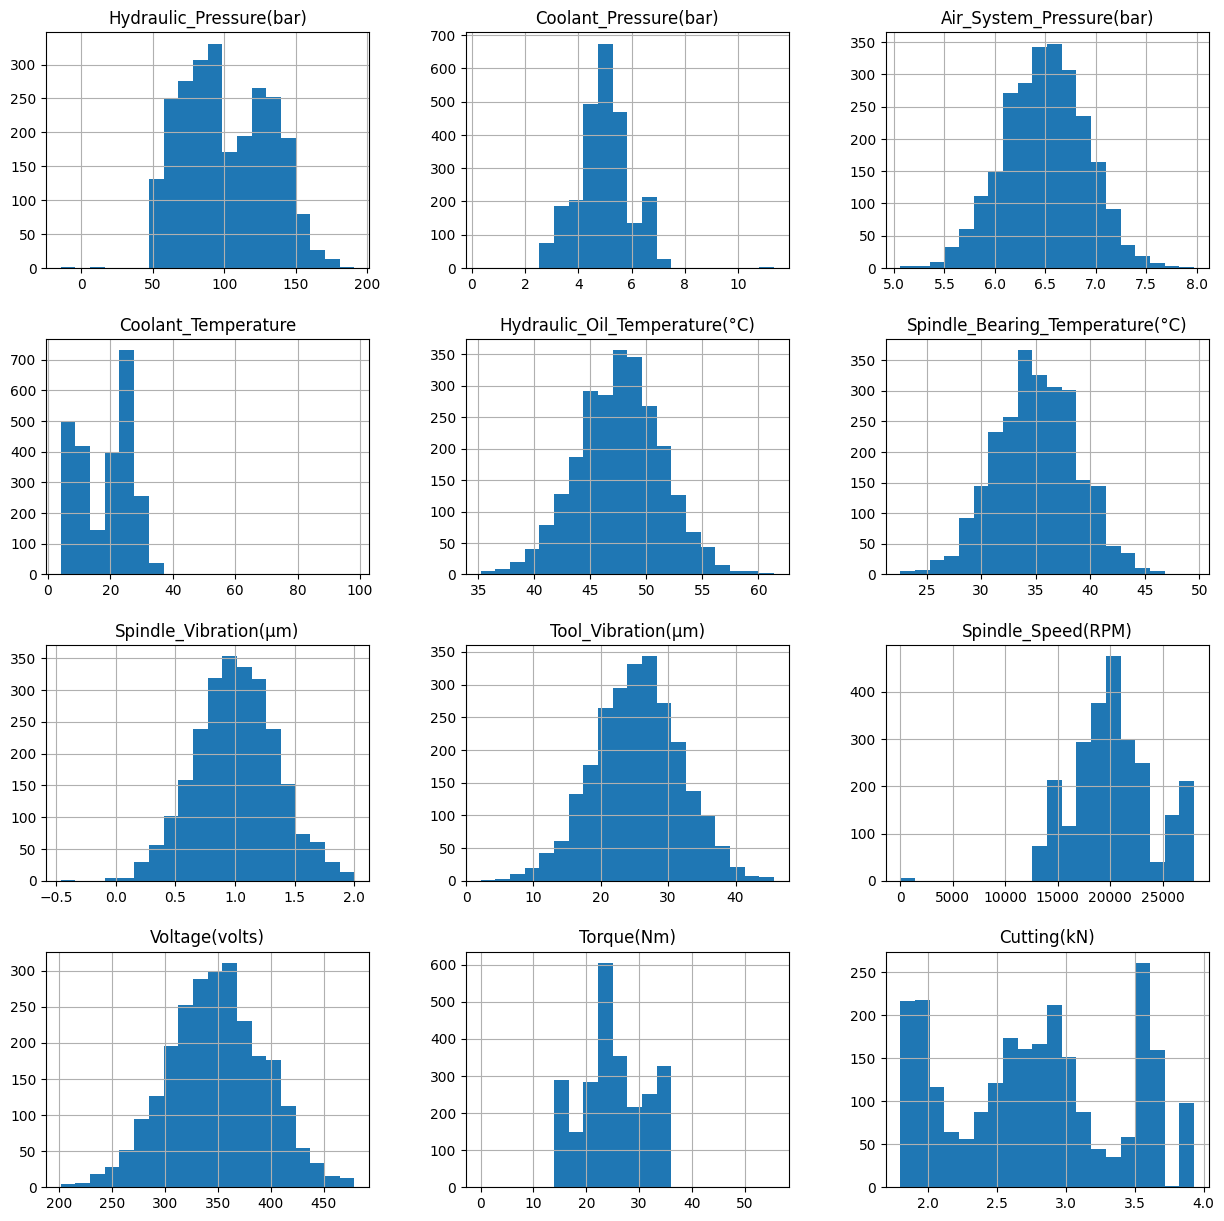

In [22]:
# plot a histogram for each numeric
df.hist(figsize=(15, 15), bins=20)
plt.show()

In [23]:
columns = ['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)', 'Coolant_Temperature','Hydraulic_Oil_Temperature(°C)', 'Spindle_Bearing_Temperature(°C)','Spindle_Vibration(µm)', 'Tool_Vibration(µm)', 'Spindle_Speed(RPM)','Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)']

kurtosis_values = []

for col in columns:
    kurtosis_value = df[col].kurtosis()
    kurtosis_values.append((col, kurtosis_value))

pd.DataFrame(kurtosis_values, columns=['Column Name', 'Kurtosis'])


,Column Name,Kurtosis
0,Hydraulic_Pressure(bar),-0.920292
1,Coolant_Pressure(bar),1.169455
2,Air_System_Pressure(bar),-0.001578
3,Coolant_Temperature,1.564639
4,Hydraulic_Oil_Temperature(°C),0.038164
5,Spindle_Bearing_Temperature(°C),-0.043862
6,Spindle_Vibration(µm),-0.018718
7,Tool_Vibration(µm),0.006451
8,Spindle_Speed(RPM),1.344769
9,Voltage(volts),-0.090328


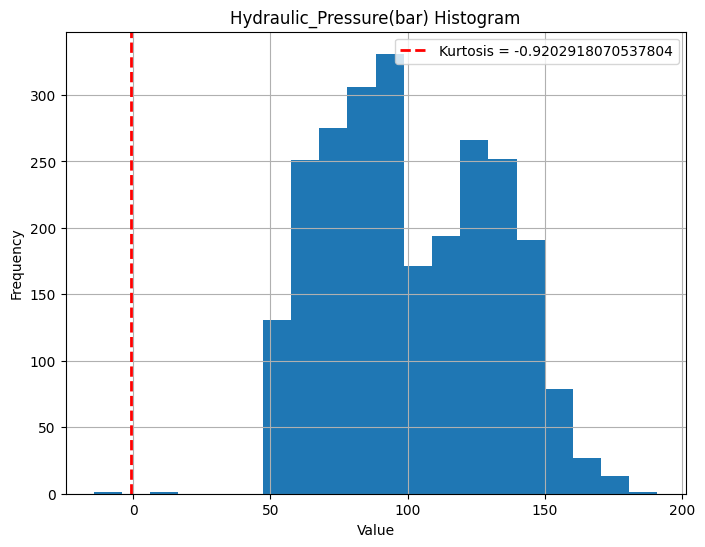

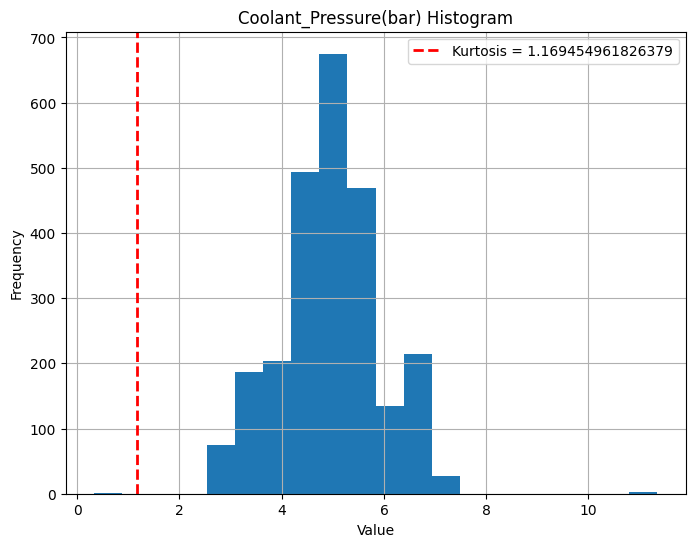

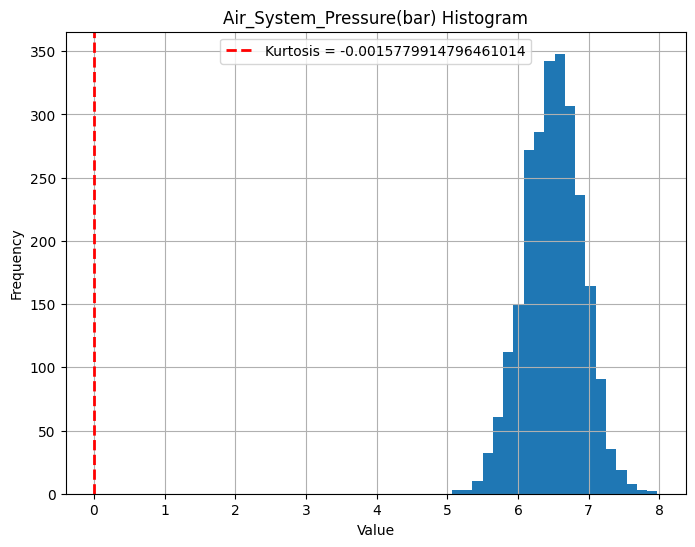

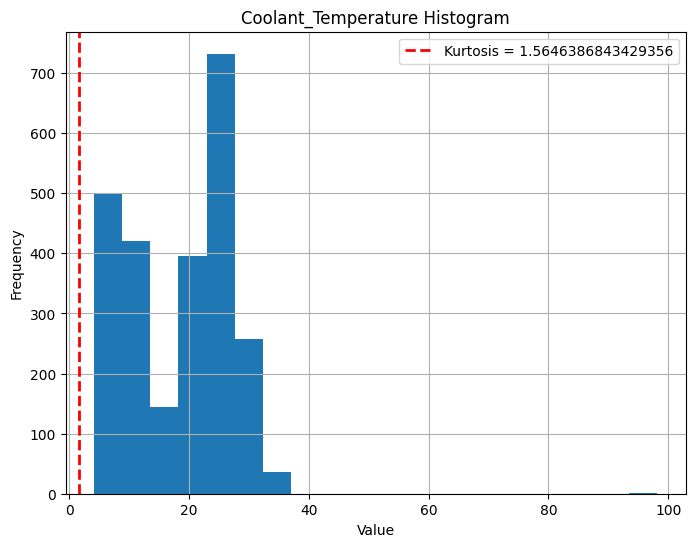

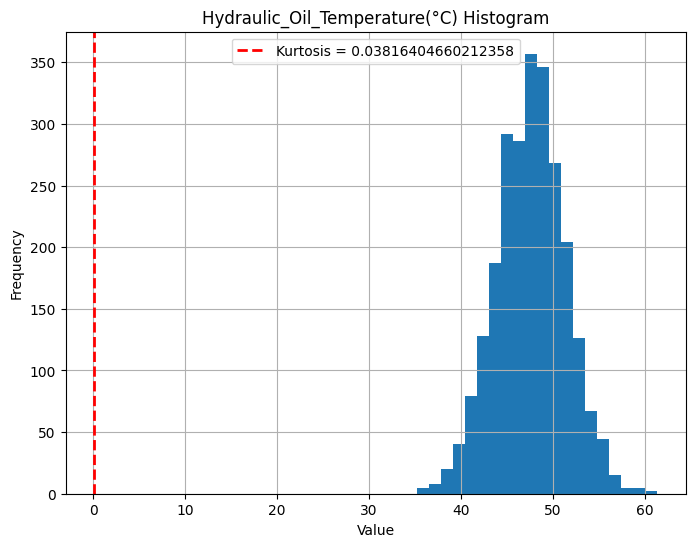

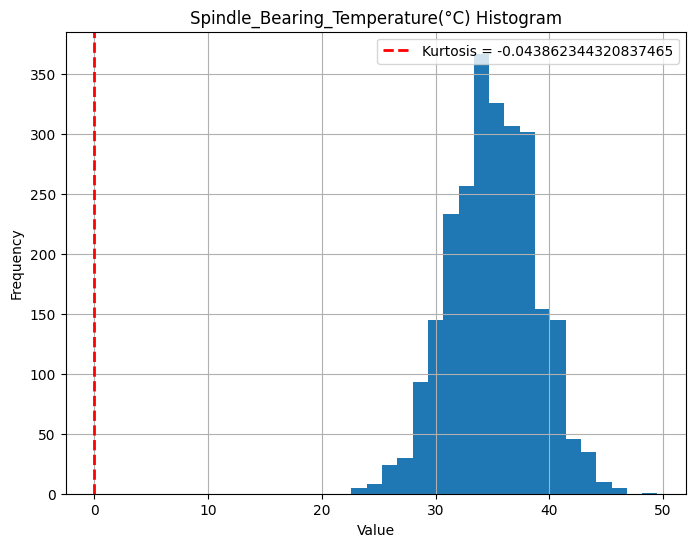

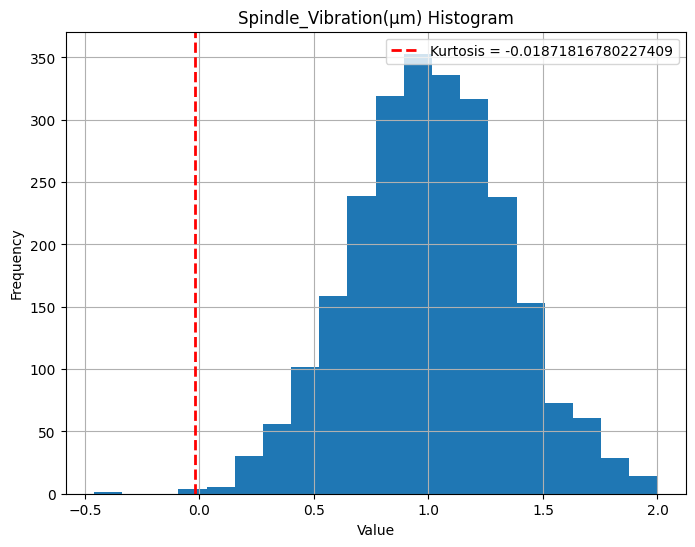

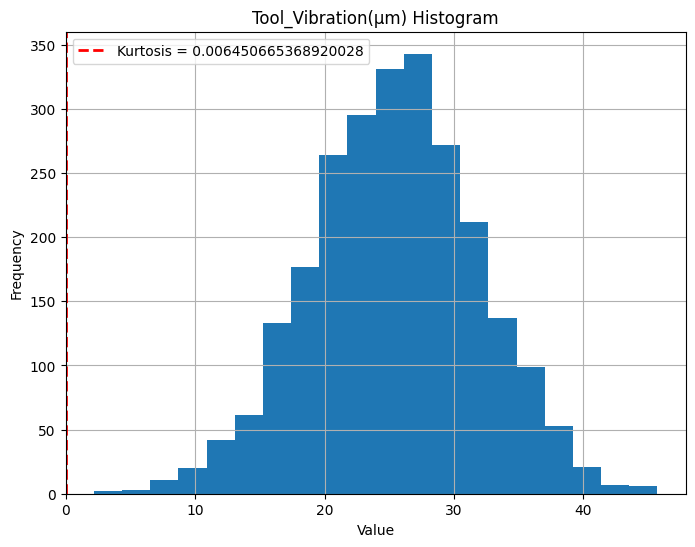

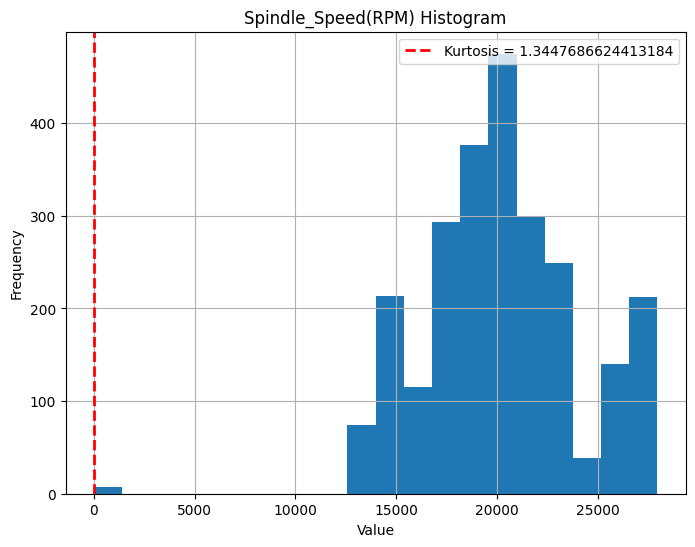

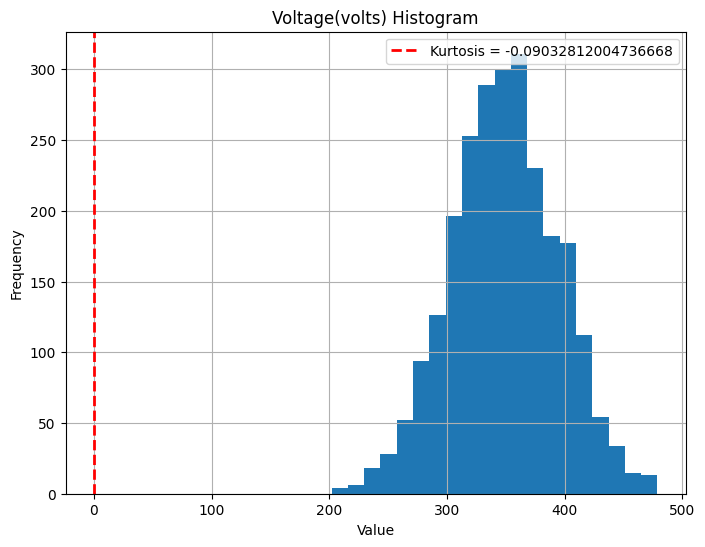

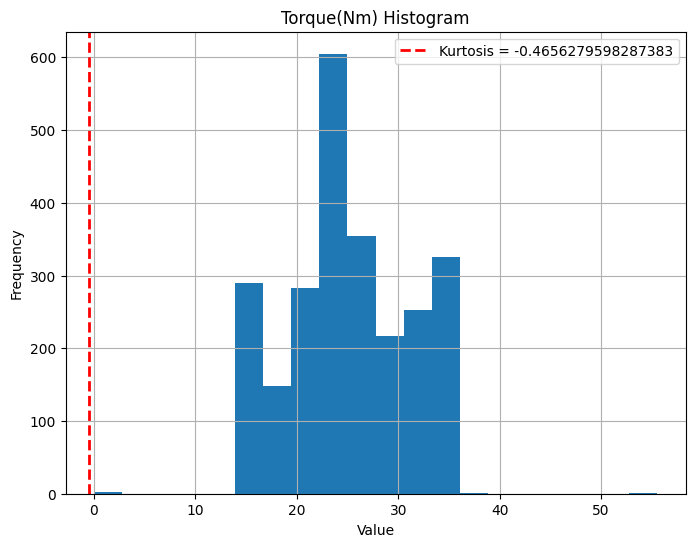

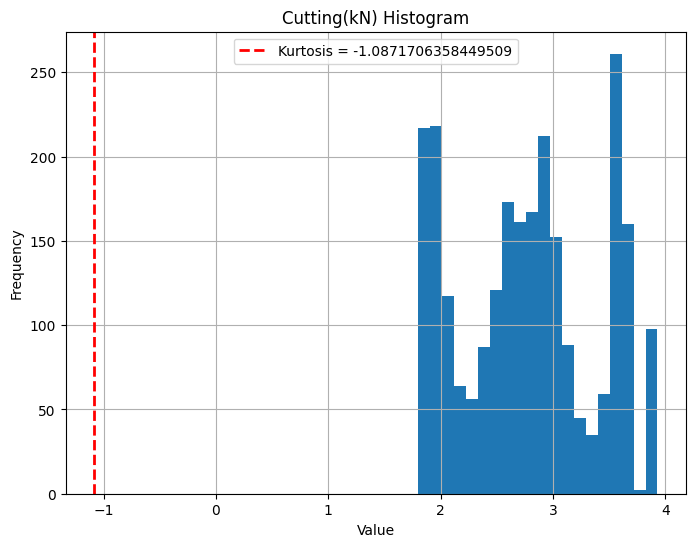

In [24]:


columns = ['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)', 'Coolant_Temperature','Hydraulic_Oil_Temperature(°C)', 'Spindle_Bearing_Temperature(°C)','Spindle_Vibration(µm)', 'Tool_Vibration(µm)', 'Spindle_Speed(RPM)','Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)']

for col in columns:
    plt.figure(figsize=(8, 6))
    df[col].hist(bins=20)  

    kurtosis_value = df[col].kurtosis()

    plt.axvline(kurtosis_value, color='r', linestyle='dashed', linewidth=2, label=f'Kurtosis = {kurtosis_value}')

    plt.title(f'{col} Histogram')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

    plt.show()


# Kurtosis Report for Data Columns

## Hydraulic_Pressure(bar) (-0.920292)
The negative kurtosis value indicates that the distribution has lighter tails compared to a normal distribution. It means the data distribution is less "tailed" than a normal distribution, which suggests that the data has fewer extreme outliers.

## Coolant_Pressure(bar) (1.169455)
The positive kurtosis value indicates that the distribution has heavier tails compared to a normal distribution. It means the data distribution has more extreme values (outliers) than a normal distribution.

## Air_System_Pressure(bar) (-0.001578)
The kurtosis value close to zero suggests that the distribution is approximately similar to a normal distribution. It has tails that are neither too heavy nor too light.

## Coolant_Temperature (1.564639)
The positive kurtosis value indicates that the distribution has very heavy tails compared to a normal distribution. It means the data distribution has many extreme values (outliers) on both sides.

## Hydraulic_Oil_Temperature(°C) (0.038164)
The kurtosis value close to zero suggests that the distribution is approximately similar to a normal distribution. It has tails that are neither too heavy nor too light.

## Spindle_Bearing_Temperature(°C) (-0.043862)
The negative kurtosis value indicates that the distribution has lighter tails compared to a normal distribution. It means the data distribution is less "tailed" than a normal distribution, suggesting fewer extreme outliers.

## Spindle_Vibration(µm) (-0.018718)
The negative kurtosis value indicates that the distribution has lighter tails compared to a normal distribution, suggesting fewer extreme outliers.

## Tool_Vibration(µm) (0.006451)
The kurtosis value close to zero suggests that the distribution is approximately similar to a normal distribution. It has tails that are neither too heavy nor too light.

## Spindle_Speed(RPM) (1.344769)
The positive kurtosis value indicates that the distribution has heavier tails compared to a normal distribution, suggesting more extreme values (outliers).

## Voltage(volts) (-0.090328)
The negative kurtosis value indicates that the distribution has lighter tails compared to a normal distribution, suggesting fewer extreme outliers.

## Torque(Nm) (-0.465628)
The negative kurtosis value indicates that the distribution has lighter tails compared to a normal distribution, suggesting fewer extreme outliers.

## Cutting(kN) (-1.087171)
The negative kurtosis value indicates that the distribution has lighter tails compared to a normal distribution, suggesting fewer extreme outliers.


| Column Name                        | Kurtosis   | Interpretation                                         |
| ---------------------------------- | ---------- | ------------------------------------------------------ |
| Hydraulic_Pressure(bar)            | -0.920292  | Lighter tails compared to a normal distribution.      |
| Coolant_Pressure(bar)              | 1.169455   | Heavier tails compared to a normal distribution.     |
| Air_System_Pressure(bar)           | -0.001578  | Distribution similar to a normal distribution.        |
| Coolant_Temperature                | 1.564639   | Very heavy tails with many extreme values.           |
| Hydraulic_Oil_Temperature(°C)      | 0.038164   | Distribution similar to a normal distribution.        |
| Spindle_Bearing_Temperature(°C)   | -0.043862  | Lighter tails compared to a normal distribution.      |
| Spindle_Vibration(µm)             | -0.018718  | Lighter tails compared to a normal distribution.      |
| Tool_Vibration(µm)                | 0.006451   | Distribution similar to a normal distribution.        |
| Spindle_Speed(RPM)                | 1.344769   | Heavier tails compared to a normal distribution.     |
| Voltage(volts)                    | -0.090328  | Lighter tails compared to a normal distribution.      |
| Torque(Nm)                        | -0.465628  | Lighter tails compared to a normal distribution.      |
| Cutting(kN)                       | -1.087171  | Lighter tails compared to a normal distribution.      |


1.  Column `Hydraulic_Pressure(bar)` showing the `left skewness` of the data and not normal distribution.
2.  Column `Coolant_Pressure(bar)` is mostle `right skewness` of the data and not normal distribution.
3.  Column `Coolant_Temperature` is extremoly rightly skewness of the data and not normal distribution.
4.  Colum `Spindle_Speed(RPM)` is `extremely left skewness` of the data and not normal distribution.
5.  Column `Torque(Nm)` is `right skewness` of the data and data distribution is clustered in one place.
6.  Column `Cutting(kN)` has uneven data distribution


## 11-Creating a Correlation Plot with the numerical values of dataset

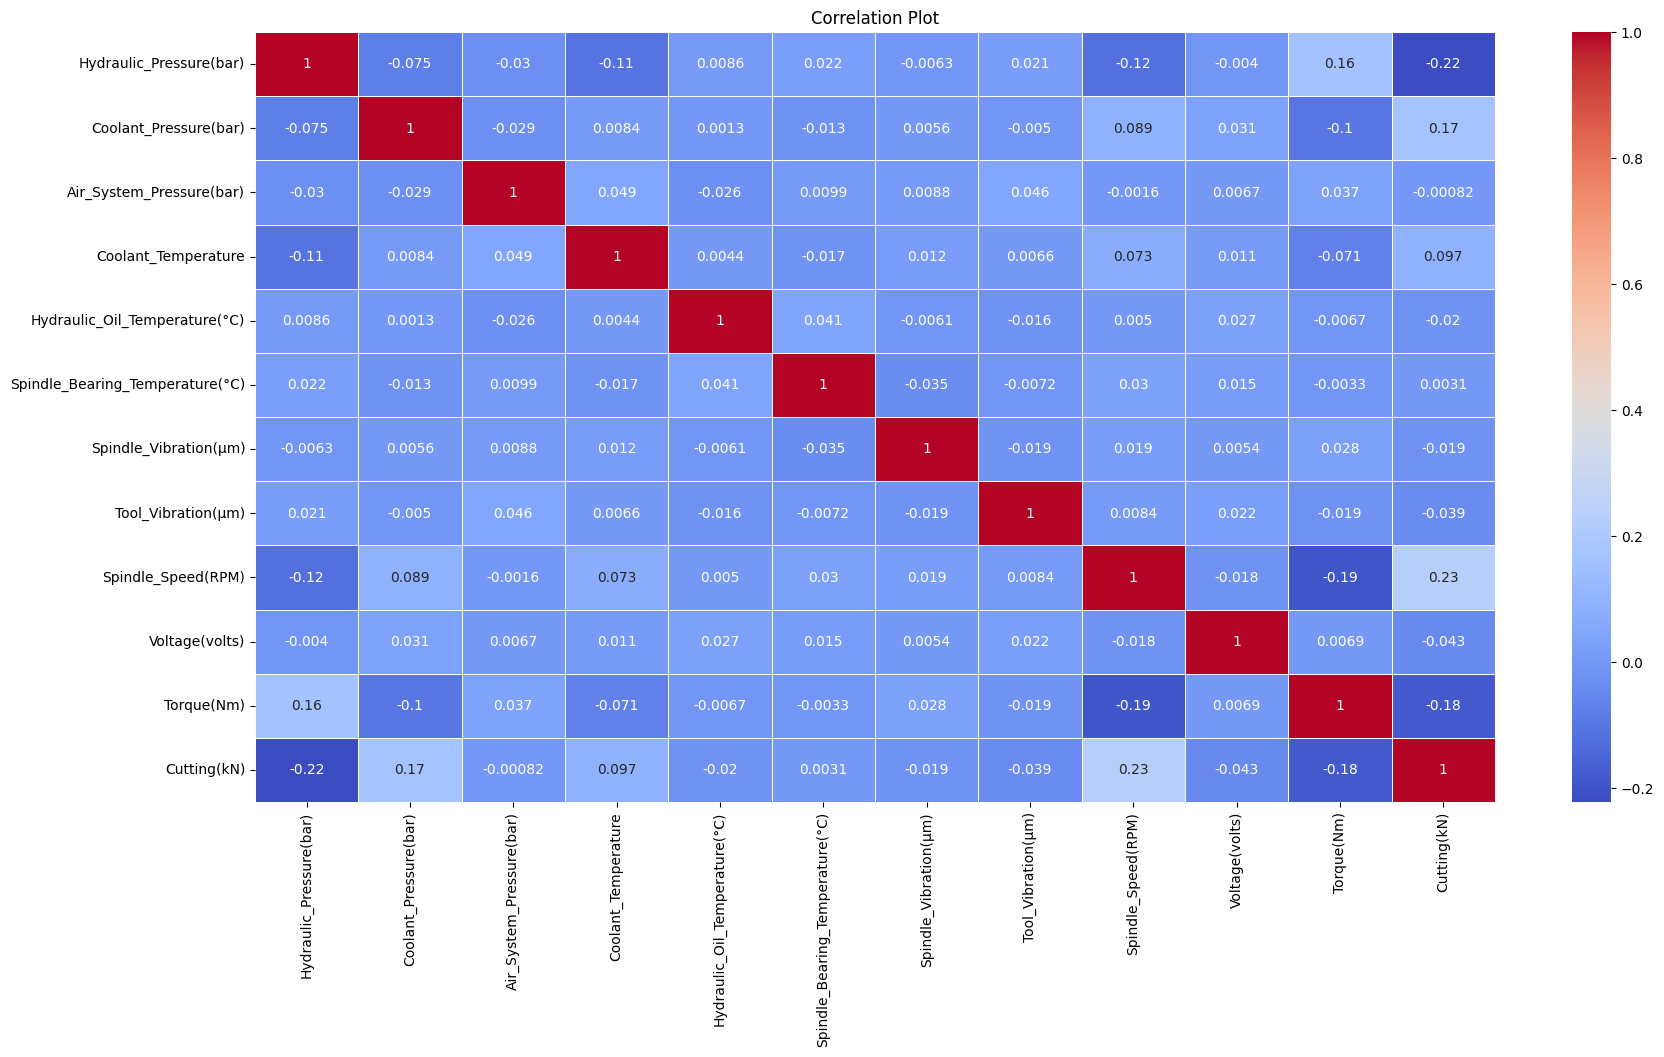

In [25]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

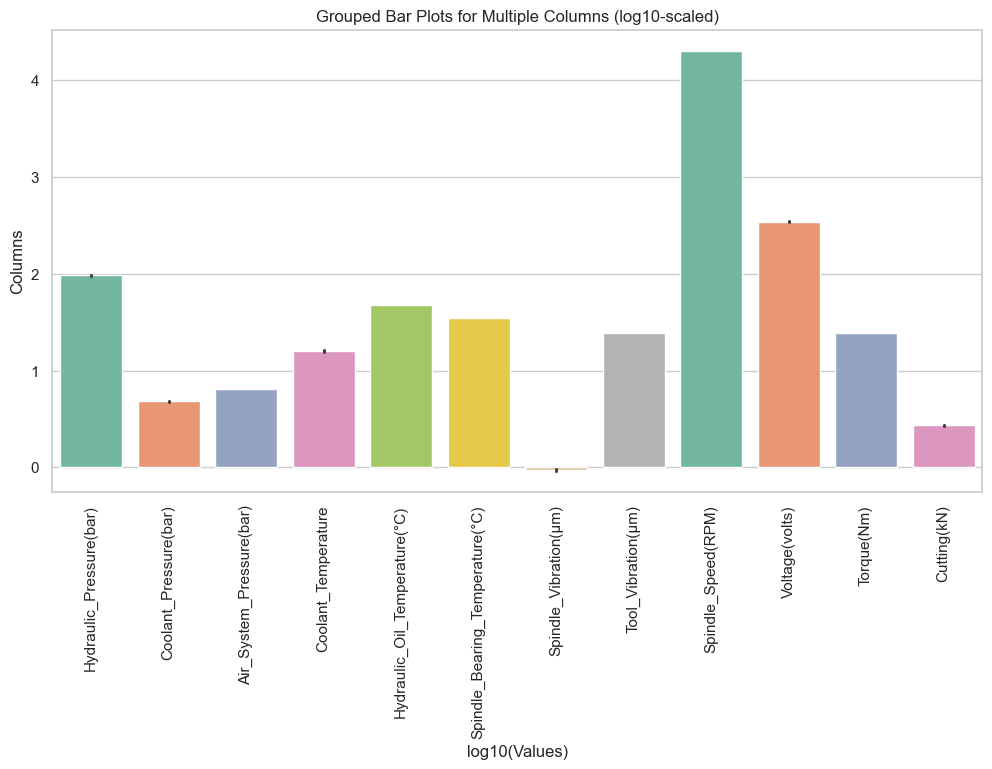

In [26]:
import numpy as np

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df_log10 = np.log10(df[numeric_cols])

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Set the style for the plot

# Create a grouped bar plot for all columns after taking the log10
sns.barplot(data=df_log10, orient="v", palette="Set2")
plt.title("Grouped Bar Plots for Multiple Columns (log10-scaled)")
plt.xlabel("log10(Values)")
plt.ylabel("Columns")
plt.xticks(rotation=90)

plt.show()

# 12- Plotting box-plt on all the numeric values

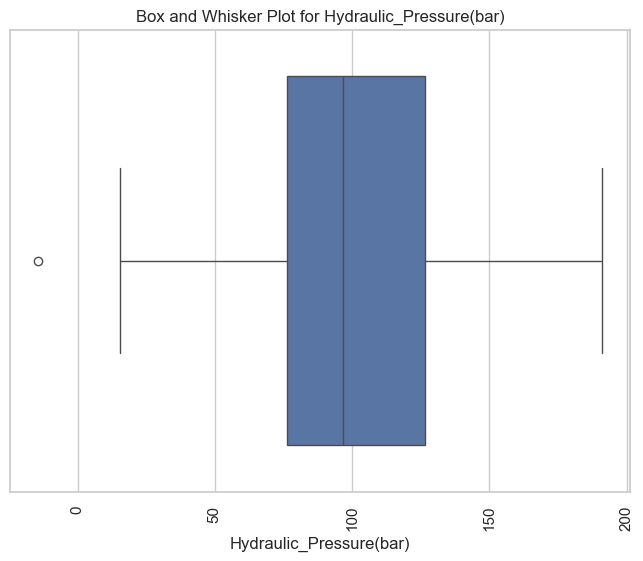

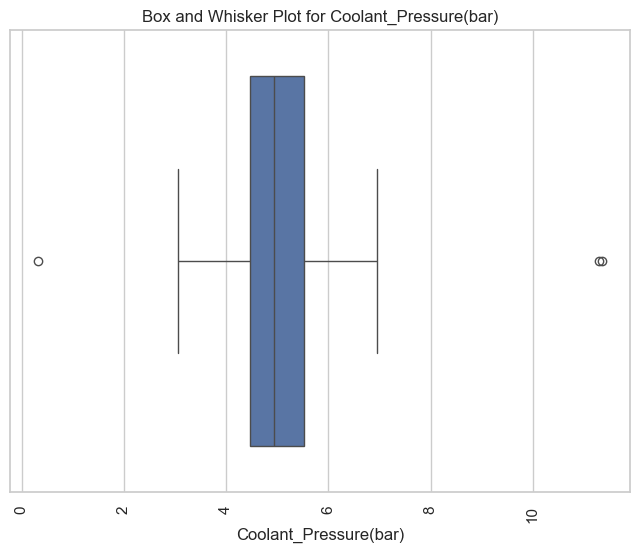

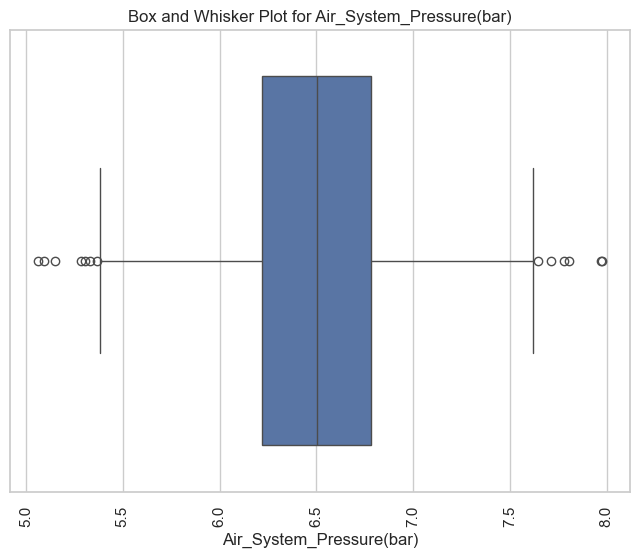

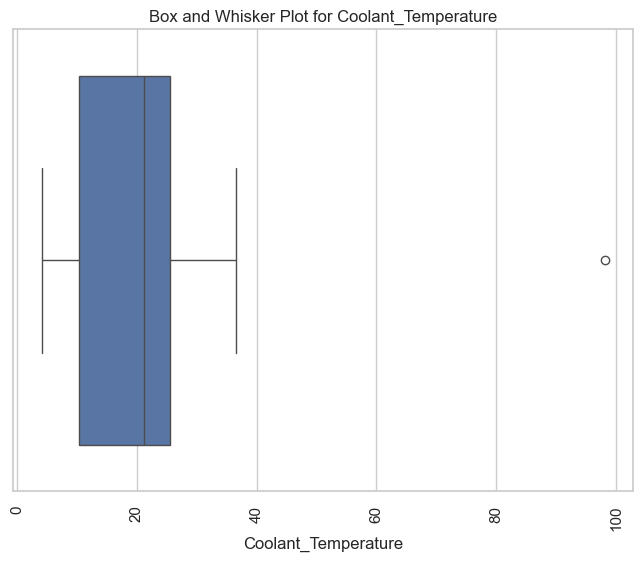

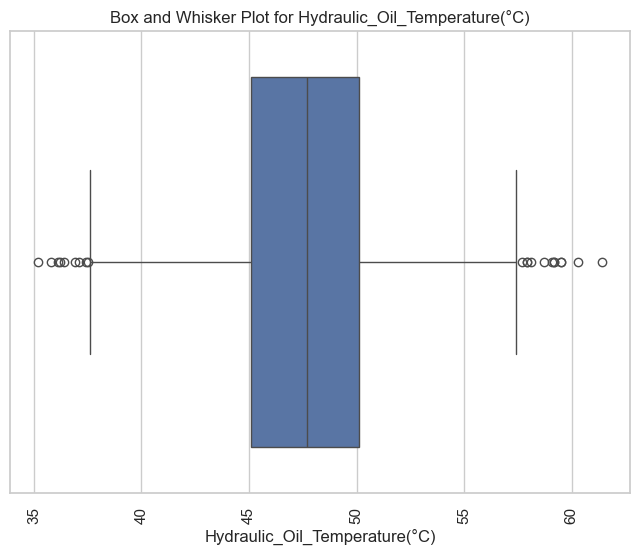

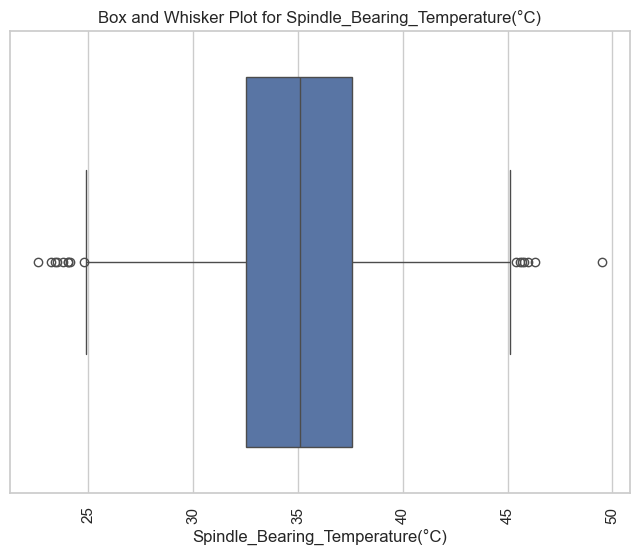

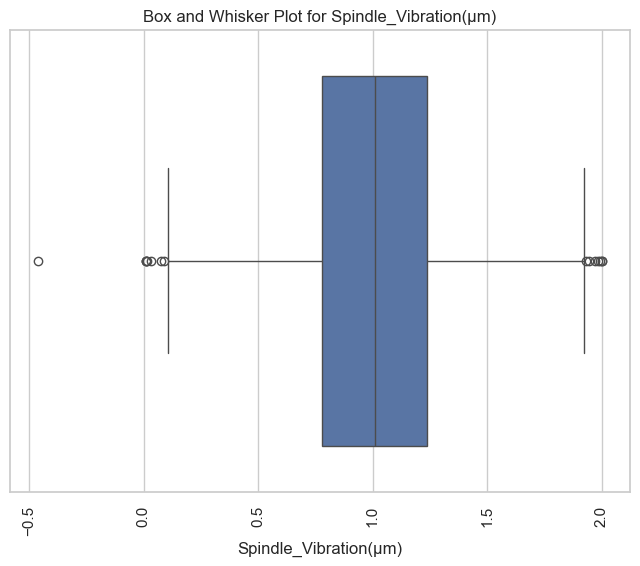

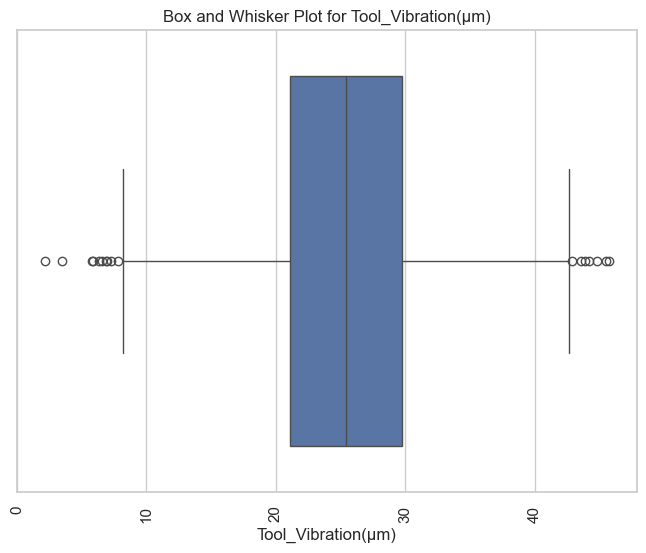

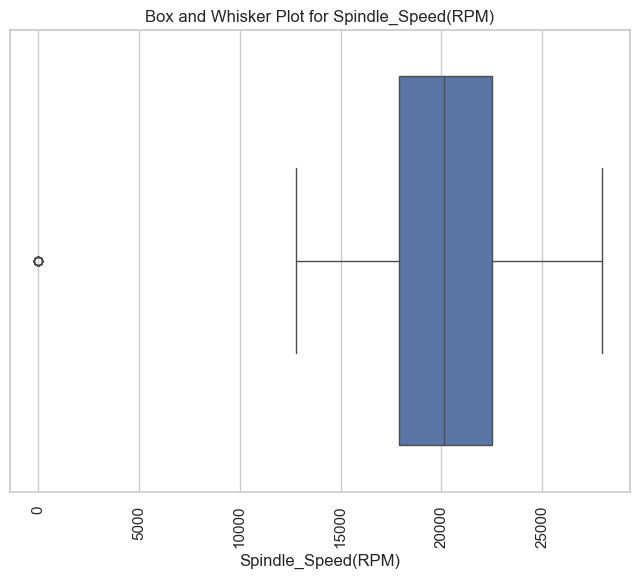

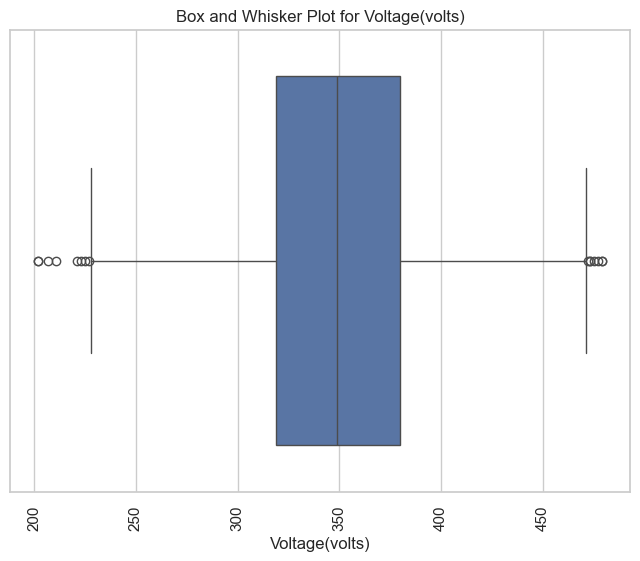

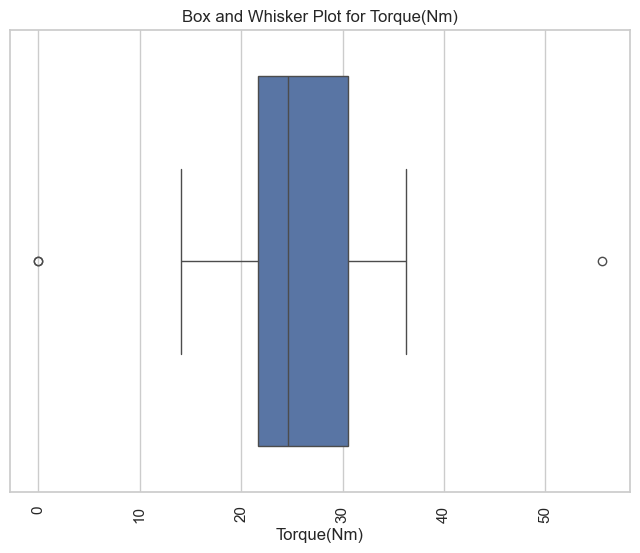

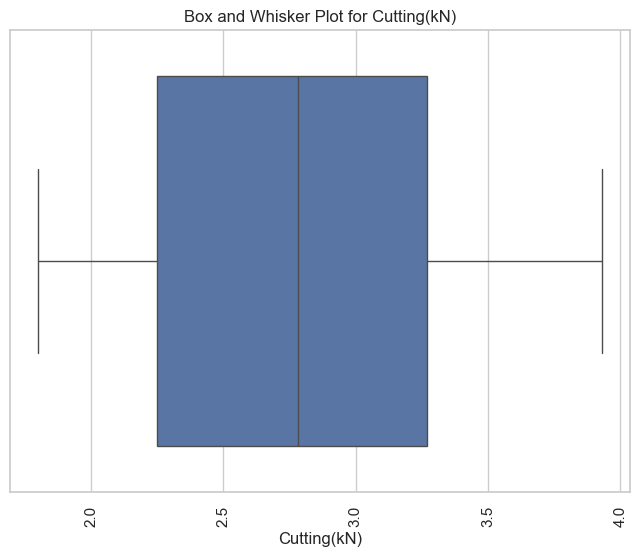

In [27]:


# Loop through your columns and create separate box and whisker plots
columns = ['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)','Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)', 'Spindle_Bearing_Temperature(°C)','Spindle_Vibration(µm)', 'Tool_Vibration(µm)', 'Spindle_Speed(RPM)','Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)']

for col in columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=df)
    plt.title(f'Box and Whisker Plot for {col}')
    plt.xticks(rotation=90)
    plt.show()


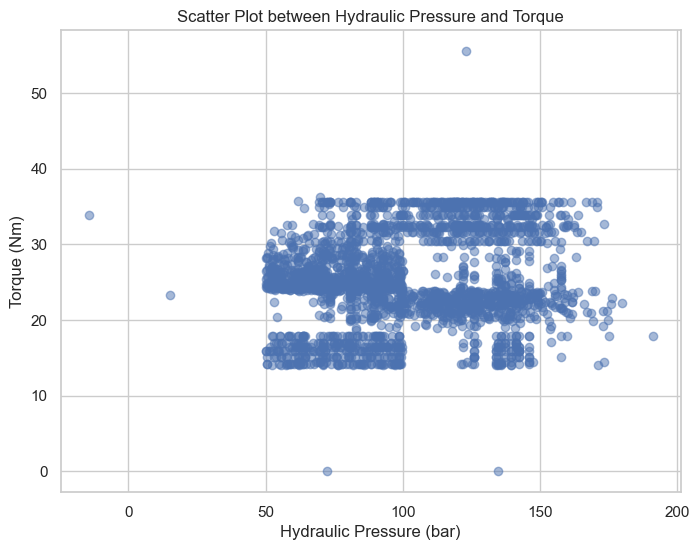

In [28]:
x = df['Hydraulic_Pressure(bar)']
y = df['Torque(Nm)']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # Adjust alpha to control point transparency
plt.title('Scatter Plot between Hydraulic Pressure and Torque')
plt.xlabel('Hydraulic Pressure (bar)')
plt.ylabel('Torque (Nm)')
plt.grid(True)

plt.show()

# 13-Cleaning The DATA

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hydraulic_Pressure(bar),2490.0,101.409084,30.289301,-14.326454,76.355000,96.763486,126.415727,191.000000
Coolant_Pressure(bar),2481.0,4.947058,0.997357,0.325000,4.462464,4.939960,5.518401,11.350000
Air_System_Pressure(bar),2483.0,6.499275,0.407279,5.063480,6.217987,6.505191,6.780550,7.973992
Coolant_Temperature,2488.0,18.559887,8.554480,4.100000,10.400000,21.200000,25.600000,98.200000
Hydraulic_Oil_Temperature(°C),2484.0,47.618317,3.768674,35.200000,45.100000,47.700000,50.100000,61.400000
Spindle_Bearing_Temperature(°C),2493.0,35.063698,3.764823,22.600000,32.500000,35.100000,37.600000,49.500000
Spindle_Vibration(µm),2489.0,1.009334,0.342898,-0.461000,0.777000,1.008000,1.236000,2.000000
Tool_Vibration(µm),2489.0,25.411975,6.437142,2.161000,21.089000,25.455000,29.790000,45.726000
Spindle_Speed(RPM),2494.0,20274.792302,3852.660056,0.000000,17919.000000,20137.500000,22501.750000,27957.000000
Voltage(volts),2494.0,348.996792,45.376024,202.000000,319.000000,349.000000,380.000000,479.000000


Based on the summary of statistics, the following columns have potential data quality issues that you should investigate:

### Torque(Nm):

The minimum value is `0.0 Nm`, which is unusual for torque data. Investigate `why there are zero values` and whether they are valid. Depending on the context, these values might indicate an issue with data collection or entry.

### Spindle_Speed(RPM):

The minimum value `is 0.0 RPM`, which is unusual for spindle speed. Investigate `why there are zero values` and whether they are valid. Similar to torque, these values might indicate an issue with data collection or entry.

### Spindle_Vibration(µm):

The range of values seems reasonable, but `there's a negative minimum value (-0.461 µm)`. Check whether negative values make sense in the context of spindle vibration measurements.

### Hydraulic_Pressure(bar):

The minimum value is `-14.326454 bar`, which is unusual for pressure data. `Investigate why there are negative values` and whether they are valid. Negative pressure values are unexpected.

### Coolant_Temperature:


The minimum temperature is `10.4°C`, which is relatively low for a coolant temperature. Investigate whether this value is within the valid range for coolant temperature. The maximum value of 98.2°C is also relatively high and should be validated.


# 14- Hydraulic_Pressure(bar):

The minimum value is `-14.326454 bar`, which is unusual for pressure data. `Investigate why there are negative values` and whether they are valid. Negative pressure values are unexpected.

In [30]:
df['Hydraulic_Pressure(bar)'].isnull().sum()

10

- There are `10` Null values in the column name `Hydraulic_Pressure(bar)`

### Let's see if has outlier values

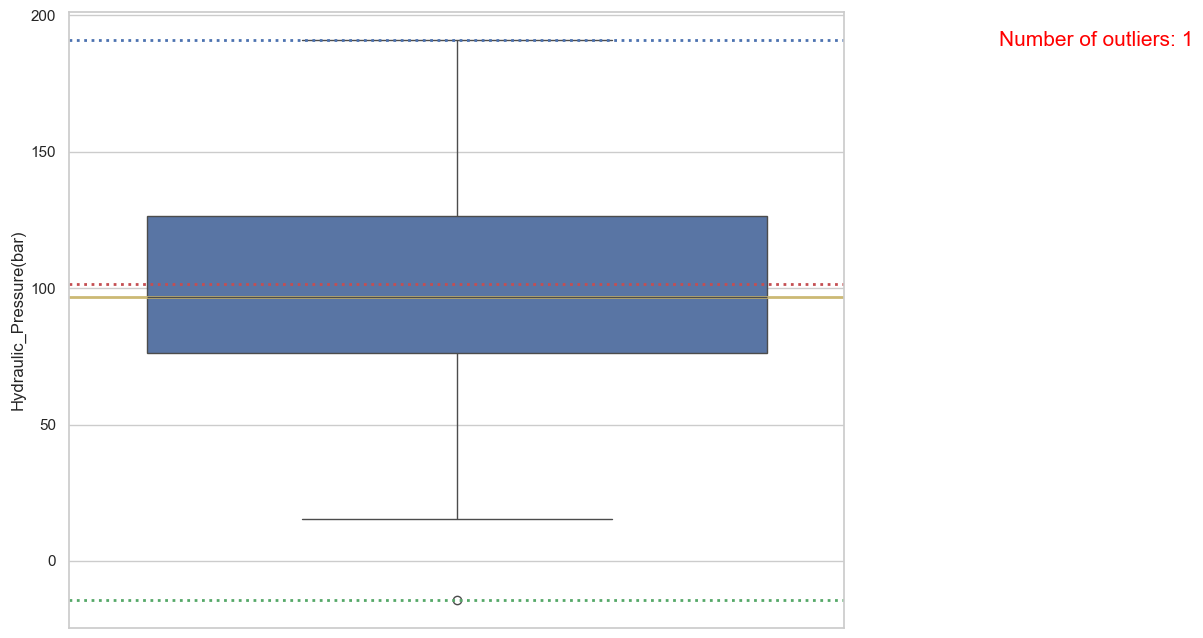

In [31]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df['Hydraulic_Pressure(bar)'])

Q1 = df['Hydraulic_Pressure(bar)'].quantile(0.25)
Q3 = df['Hydraulic_Pressure(bar)'].quantile(0.75)
IQR = Q3 - Q1

outliers = df['Hydraulic_Pressure(bar)'][(df['Hydraulic_Pressure(bar)'] < (Q1 - 1.5 * IQR)) | (df['Hydraulic_Pressure(bar)'] > (Q3 + 1.5 * IQR))]
num_outliers = outliers.count()

plt.text(0.95, df['Hydraulic_Pressure(bar)'].max(), f'Number of outliers: {num_outliers}', verticalalignment='center', horizontalalignment='right', color='red', fontsize=15)

# Add horizontal lines for min, max, median, and mean
plt.axhline(df['Hydraulic_Pressure(bar)'].min(), color='g', linestyle='dotted', linewidth=2)
plt.axhline(df['Hydraulic_Pressure(bar)'].max(), color='b', linestyle='dotted', linewidth=2)
plt.axhline(df['Hydraulic_Pressure(bar)'].median(), color='y', linestyle='solid', linewidth=2)
plt.axhline(df['Hydraulic_Pressure(bar)'].mean(), color='r', linestyle='dotted', linewidth=2)

plt.show()

- Only `1` outlier is present in the distribution

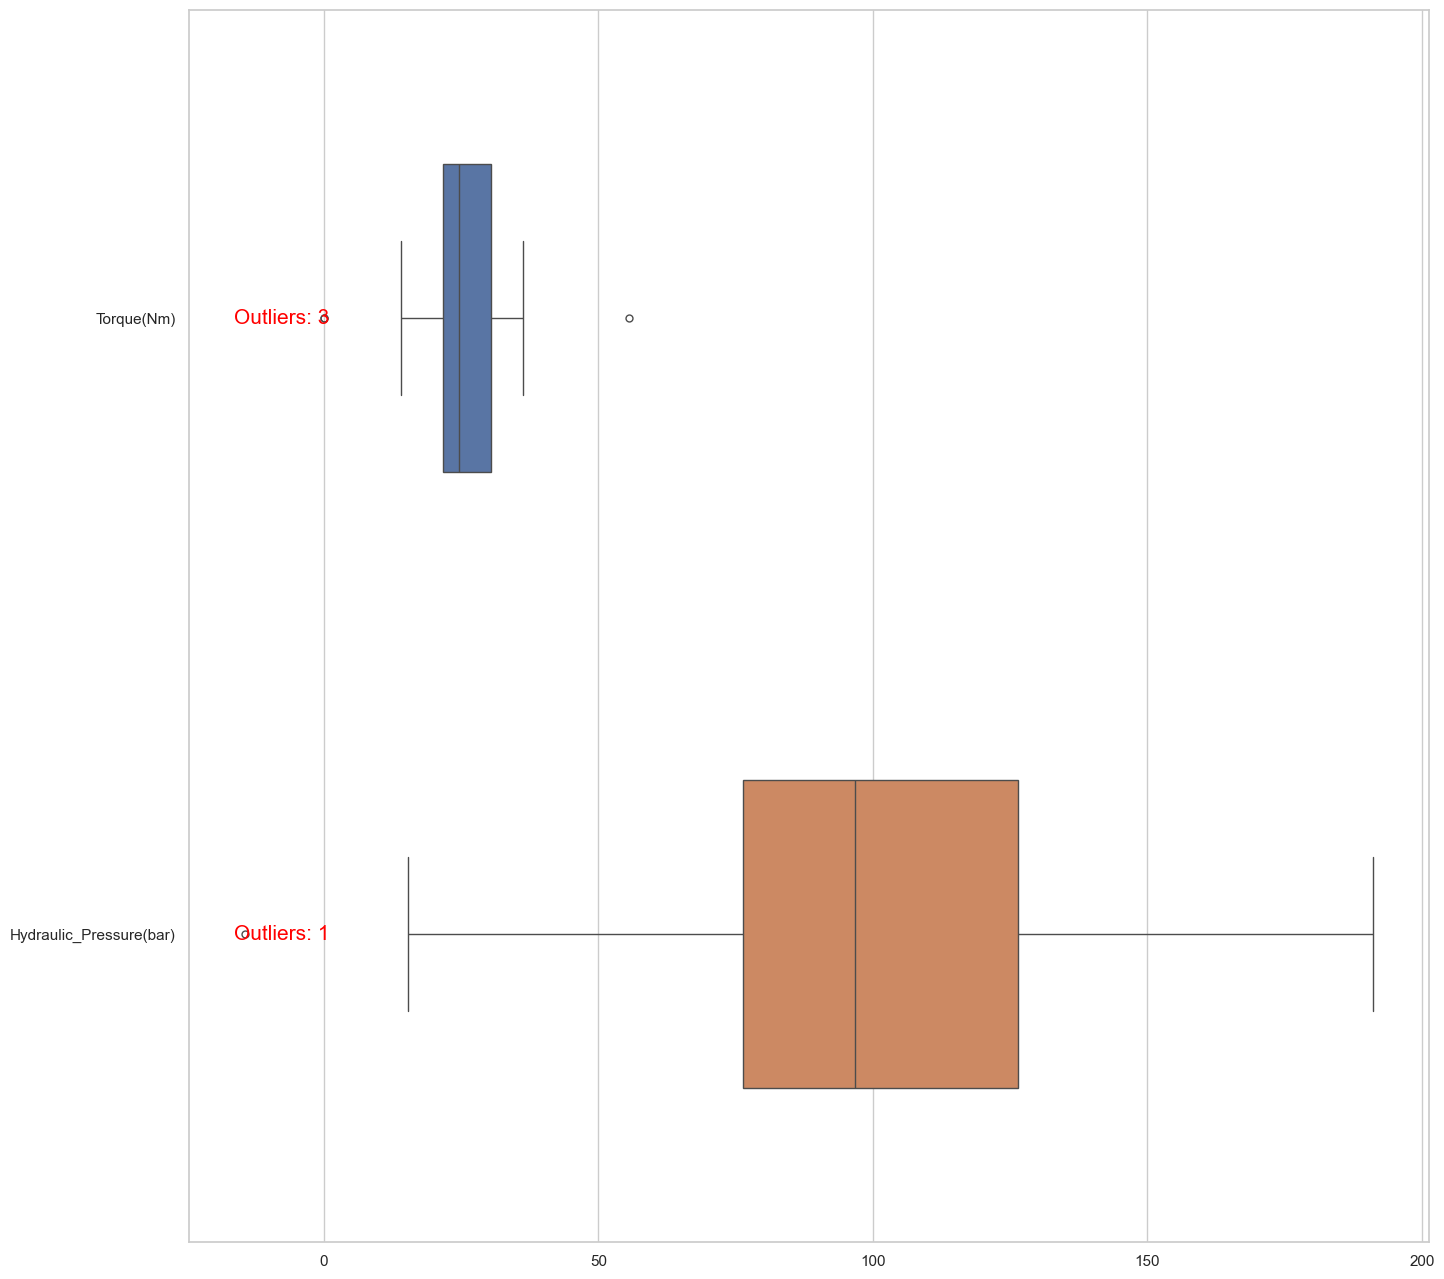

In [32]:


plt.figure(figsize=(16, 16))

columns = ['Torque(Nm)', 'Hydraulic_Pressure(bar)']
for i, col in enumerate(columns):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[col][(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    num_outliers = outliers.count()

    plt.text(0.95, i, f'Outliers: {num_outliers}', verticalalignment='center', horizontalalignment='right', color='red', fontsize=15)

sns.boxplot(data=df[columns], width=0.5, fliersize=5, orient='h')

plt.show()

In [33]:
df['Hydraulic_Pressure(bar)'].min()


-14.32645418

In [34]:
df['Hydraulic_Pressure(bar)'].max()

191.0

In [35]:
Q1 = df['Hydraulic_Pressure(bar)'].quantile(0.25)
Q3 = df['Hydraulic_Pressure(bar)'].quantile(0.75)
IQR = Q3 - Q1

outliers = df['Hydraulic_Pressure(bar)'][(df['Hydraulic_Pressure(bar)'] < (Q1 - 1.5 * IQR)) | (df['Hydraulic_Pressure(bar)'] > (Q3 + 1.5 * IQR))]

print(outliers)

2058   -14.326454
Name: Hydraulic_Pressure(bar), dtype: float64


In [36]:

df.loc[2058]

Date                                         06-02-2022
Machine_ID                         Makino-L3-Unit1-2015
Assembly_Line_No                           Shopfloor-L3
Hydraulic_Pressure(bar)                      -14.326454
Coolant_Pressure(bar)                          5.067261
Air_System_Pressure(bar)                       6.163999
Coolant_Temperature                                 6.8
Hydraulic_Oil_Temperature(°C)                      49.6
Spindle_Bearing_Temperature(°C)                    39.2
Spindle_Vibration(µm)                             1.627
Tool_Vibration(µm)                               17.723
Spindle_Speed(RPM)                              20386.0
Voltage(volts)                                    348.0
Torque(Nm)                                    33.923365
Cutting(kN)                                        2.73
Downtime                             No_Machine_Failure
Name: 2058, dtype: object

In [37]:
df['Hydraulic_Pressure(bar)'].isna().sum()


10

In [38]:
# replace the outliers in the colum hydraulic pressure with the at the index number 2058 with the NAN value
df.loc[2058, 'Hydraulic_Pressure(bar)'] = np.nan


In [39]:
df['Hydraulic_Pressure(bar)'].isna().sum()


11

In [40]:
# replasing all the nan values in the column hydraulic pressure with the mean value of the column
df['Hydraulic_Pressure(bar)'].fillna(df['Hydraulic_Pressure(bar)'].mean(), inplace=True)

<Axes: >

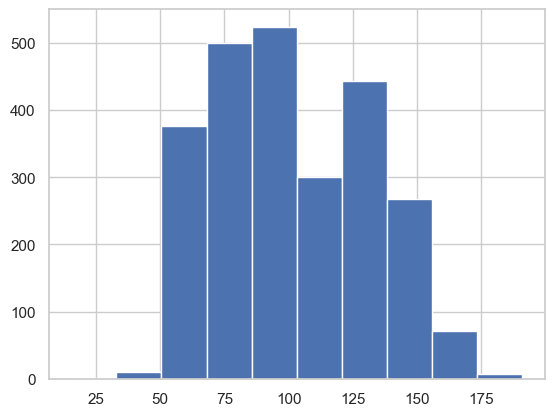

In [41]:
# plot a histogram for df['Hydraulic_Pressure(bar)']
figsize=(10, 8)
df['Hydraulic_Pressure(bar)'].hist()

In [42]:
# Locating the misising value sin the column 'Hydraulic_Pressure(bar)'
df['Hydraulic_Pressure(bar)'].isnull().sum()

0

# 15- Working on the outline of the column name `coolant presusre`

In [43]:
df['Coolant_Pressure(bar)'].min()

0.325

In [44]:
df['Coolant_Pressure(bar)'].max()

11.35

In [45]:
df['Coolant_Pressure(bar)'].describe()

count    2481.000000
mean        4.947058
std         0.997357
min         0.325000
25%         4.462464
50%         4.939960
75%         5.518401
max        11.350000
Name: Coolant_Pressure(bar), dtype: float64

In [46]:
Q1 = df['Coolant_Pressure(bar)'].quantile(0.25)
Q3 = df['Coolant_Pressure(bar)'].quantile(0.75)
IQR = Q3 - Q1

outliers = df['Coolant_Pressure(bar)'][(df['Coolant_Pressure(bar)'] < (Q1 - 1.5 * IQR)) | (df['Coolant_Pressure(bar)'] > (Q3 + 1.5 * IQR))]

print(outliers)

851    11.350
853    11.300
913     0.325
Name: Coolant_Pressure(bar), dtype: float64


In [47]:
df['Coolant_Pressure(bar)'].isna().sum()

19

<Axes: >

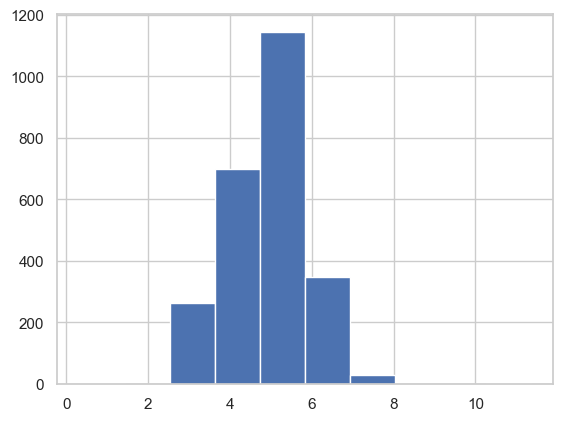

In [48]:
figsize=(10, 8)
df['Coolant_Pressure(bar)'].hist()

<Axes: ylabel='Coolant_Pressure(bar)'>

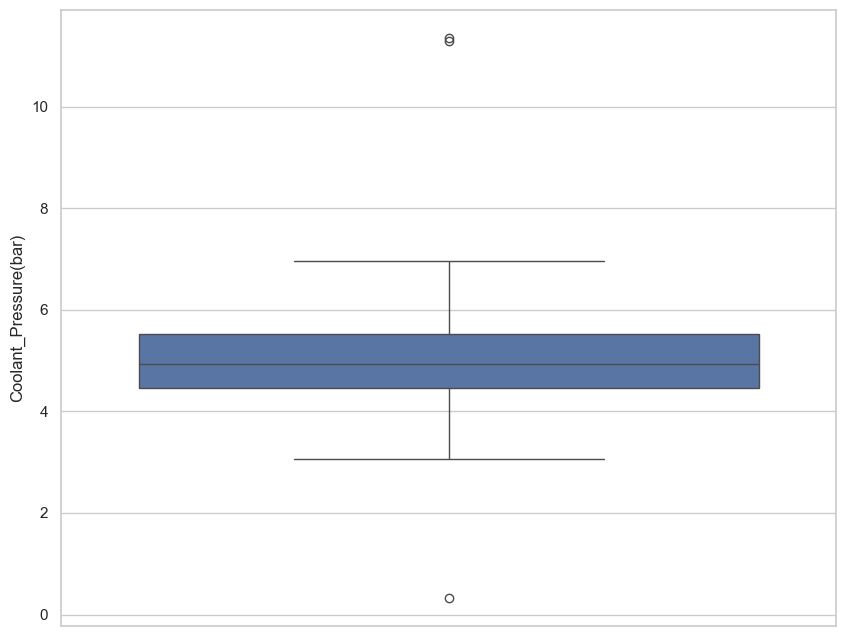

In [49]:
# Box plot for the column 'Coolant_Pressure(bar)'
plt.figure(figsize=(10, 8))
sns.boxplot(data=df['Coolant_Pressure(bar)'])


In [50]:
# Impute the outliers in the column 'Coolant_Pressure(bar)' with the mean value of the column
df.loc[[851, 853, 913], 'Coolant_Pressure(bar)'] = np.nan


In [51]:
# Impute the nan in the column 'Coolant_Pressure(bar)' with the mean value of the column
df['Coolant_Pressure(bar)'].fillna(df['Coolant_Pressure(bar)'].mean(), inplace=True)

<Axes: >

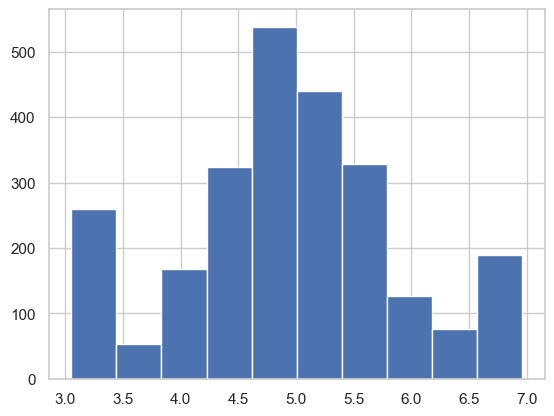

In [52]:
figsize=(10, 8)
df['Coolant_Pressure(bar)'].hist()

# 16- Working on the the column name `Torque(Nm)`

In [53]:
df['Torque(Nm)']

0       24.055326
1       14.202890
2       24.049267
3       25.860029
4       25.515874
5       25.521330
6       25.454652
7       34.973004
8       32.519299
9       25.618567
10      25.461440
11      25.613069
12      25.464156
13      25.584244
14      25.606200
15      25.600708
16      25.597962
17      25.592473
18      25.465514
19      25.522694
20      25.460082
21      23.513865
22      25.466873
23      23.505761
24      23.519657
25      23.520816
26      25.614444
27      23.848636
28      25.451938
29      23.851019
30      23.848636
31      23.501132
32      23.392885
33      25.454652
34      24.462082
35      24.472114
36      35.581221
37      14.202890
38      24.536259
39      24.385861
40      33.923365
41      14.109994
42      17.899311
43      35.580334
44      23.137789
45      16.964105
46      31.620335
47      30.514008
48      35.580334
49      23.300405
50      23.318615
51      23.322032
52      23.300405
53      23.300405
54      16.449554
55      15

In [54]:
df['Torque(Nm)'].value_counts().sum()

2479

In [55]:
df['Torque(Nm)'].nunique()

1327

In [56]:
df['Torque(Nm)'].isnull().sum()

21

<Axes: >

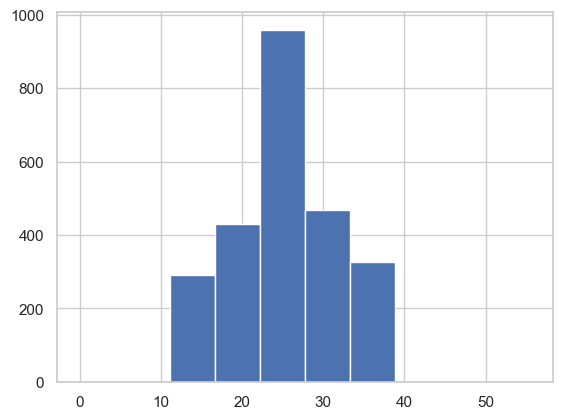

In [57]:
# Plotting a histogram for the column 'Torque(Nm)'
figsize=(10, 8)
df['Torque(Nm)'].hist()


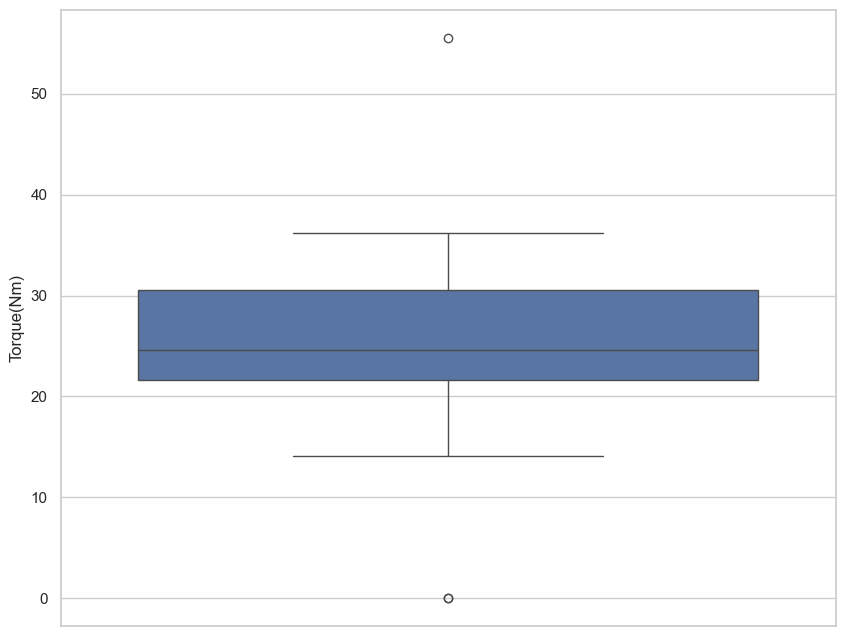

In [58]:
# Deploying a box plot for the column 'Torque(Nm)'
plt.figure(figsize=(10, 8))
sns.boxplot(data=df['Torque(Nm)'])
plt.show()

In [59]:
df['Torque(Nm)'].describe()


count    2479.000000
mean       25.234968
std         6.138564
min         0.000000
25%        21.666115
50%        24.647736
75%        30.514008
max        55.552400
Name: Torque(Nm), dtype: float64

# 17-The minimum value is `0.0 Nm`, which is unusual for torque data. Investigate `why there are zero values` and whether they are valid.
Depending on the context, these values might indicate an issue with data collection or entry.

In [60]:
Q1 = df['Torque(Nm)'].quantile(0.25)
Q3 = df['Torque(Nm)'].quantile(0.75)
IQR = Q3 - Q1

outliers = df['Torque(Nm)'][(df['Torque(Nm)'] < (Q1 - 1.5 * IQR)) | (df['Torque(Nm)'] > (Q3 + 1.5 * IQR))]
print(outliers)

478      0.0000
879     55.5524
2000     0.0000
Name: Torque(Nm), dtype: float64


In [61]:
# display the full row in teh dataset at index number 478
df.loc[478]

# No need to change the outliers in the column 'Torque(Nm)' as the machine was down so there will be no torque value

Date                                         24-04-2022
Machine_ID                         Makino-L1-Unit1-2013
Assembly_Line_No                           Shopfloor-L1
Hydraulic_Pressure(bar)                          134.54
Coolant_Pressure(bar)                          6.893182
Air_System_Pressure(bar)                       6.649668
Coolant_Temperature                                 8.0
Hydraulic_Oil_Temperature(°C)                      48.3
Spindle_Bearing_Temperature(°C)                    32.9
Spindle_Vibration(µm)                              0.47
Tool_Vibration(µm)                               36.048
Spindle_Speed(RPM)                              21951.0
Voltage(volts)                                    334.0
Torque(Nm)                                          0.0
Cutting(kN)                                        3.67
Downtime                                Machine_Failure
Name: 478, dtype: object

In [62]:

df.loc[2000]
# This need to be imputed as machine was working and hydraulic pressure was an othe machine stat showing the value of a working machinery so i decide to impute this with mean


Date                                         06-04-2022
Machine_ID                         Makino-L2-Unit1-2015
Assembly_Line_No                           Shopfloor-L2
Hydraulic_Pressure(bar)                        72.46602
Coolant_Pressure(bar)                          5.004733
Air_System_Pressure(bar)                       6.985822
Coolant_Temperature                                10.6
Hydraulic_Oil_Temperature(°C)                      50.1
Spindle_Bearing_Temperature(°C)                    29.8
Spindle_Vibration(µm)                             0.413
Tool_Vibration(µm)                               32.541
Spindle_Speed(RPM)                              20112.0
Voltage(volts)                                    354.0
Torque(Nm)                                          0.0
Cutting(kN)                                        2.02
Downtime                             No_Machine_Failure
Name: 2000, dtype: object

In [63]:
import numpy as np
df.loc[2000, 'Torque(Nm)'] = np.nan


In [64]:

df['Torque(Nm)'].fillna(df['Torque(Nm)'].mean(), inplace=True)


In [65]:
df.loc[879]

Date                                         20-02-2022
Machine_ID                         Makino-L3-Unit1-2015
Assembly_Line_No                           Shopfloor-L3
Hydraulic_Pressure(bar)                      123.132833
Coolant_Pressure(bar)                          5.820914
Air_System_Pressure(bar)                       6.993879
Coolant_Temperature                                 5.7
Hydraulic_Oil_Temperature(°C)                      48.3
Spindle_Bearing_Temperature(°C)                    31.6
Spindle_Vibration(µm)                             1.422
Tool_Vibration(µm)                               16.827
Spindle_Speed(RPM)                              23275.0
Voltage(volts)                                    352.0
Torque(Nm)                                      55.5524
Cutting(kN)                                        3.29
Downtime                             No_Machine_Failure
Name: 879, dtype: object

In [66]:
# Change the index 879 with the nan values.
df.loc[879, 'Torque(Nm)'] = np.nan

In [67]:
# Replacing all the nan values in the column 'Torque(Nm)' with the mean value of the column
df['Torque(Nm)'].fillna(df['Torque(Nm)'].mean(), inplace=True)

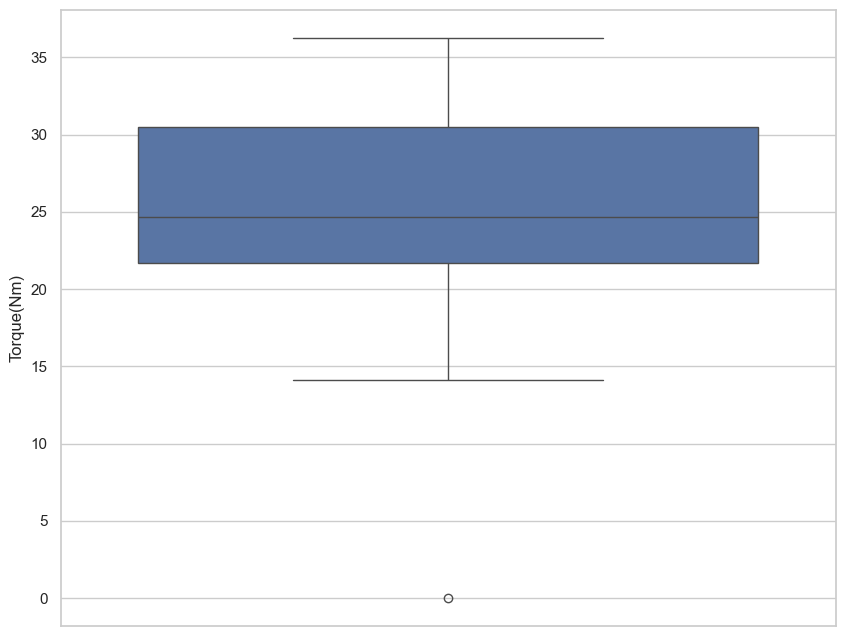

In [68]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df['Torque(Nm)'])
plt.show()

# 18- Spindle_Speed(RPM):

The minimum value `is 0.0 RPM`, which is unusual for spindle speed. Investigate `why there are zero values` and whether they are valid. Similar to torque, these values might indicate an issue with data collection or entry.

In [69]:
df['Spindle_Speed(RPM)']

0       25892.0
1       19856.0
2       19851.0
3       18461.0
4       26526.0
5       27613.0
6       26605.0
7       14266.0
8       20413.0
9       20504.0
10      17919.0
11      21951.0
12      25528.0
13      18660.0
14      18644.0
15      18648.0
16      18650.0
17      18654.0
18      23432.0
19      21951.0
20      27957.0
21      20303.0
22      26605.0
23      20310.0
24      20298.0
25      20297.0
26      18638.0
27      20018.0
28      20504.0
29      20016.0
30      20018.0
31      20314.0
32      13272.0
33      18755.0
34      27613.0
35      26526.0
36      15217.0
37      19440.0
38      19457.0
39      19577.0
40      14152.0
41      19456.0
42      19443.0
43      17726.0
44      14152.0
45      19784.0
46      19197.0
47      18436.0
48      17726.0
49      16198.0
50      15217.0
51      20470.0
52      17726.0
53      14266.0
54      18592.0
55      18594.0
56      18594.0
57      18590.0
58      20143.0
59      20066.0
60      14152.0
61      20033.0
62      

In [70]:
df['Spindle_Speed(RPM)'].value_counts().sum()


2494

In [71]:
df['Spindle_Speed(RPM)'].nunique()

1180

In [72]:
df['Spindle_Speed(RPM)'].isnull().sum()

6

<Axes: >

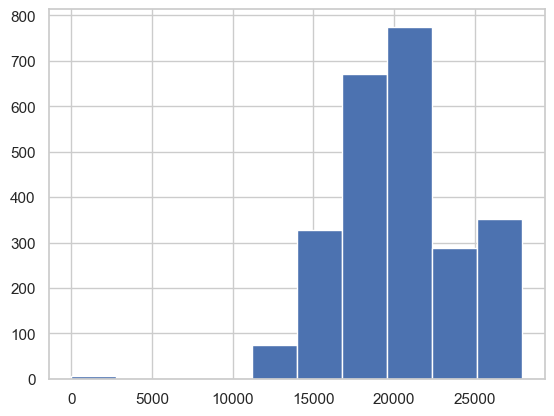

In [73]:
figsize=(10, 8)
df['Spindle_Speed(RPM)'].hist()


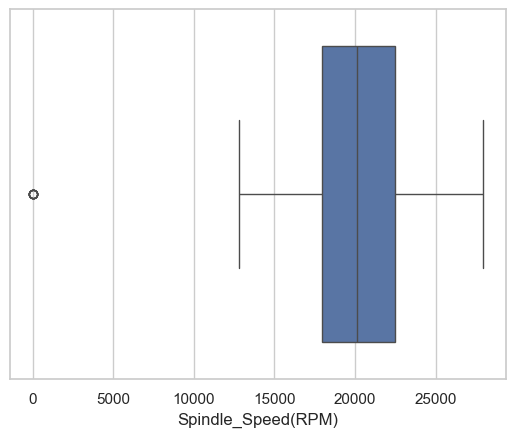

In [74]:
sns.boxplot(x='Spindle_Speed(RPM)', data=df)
plt.show()

In [75]:
Q1 = df['Spindle_Speed(RPM)'].quantile(0.25)
Q3 = df['Spindle_Speed(RPM)'].quantile(0.75)
IQR = Q3 - Q1

outliers = df['Spindle_Speed(RPM)'][(df['Spindle_Speed(RPM)'] < (Q1 - 1.5 * IQR)) | (df['Spindle_Speed(RPM)'] > (Q3 + 1.5 * IQR))]
print(outliers)

466     0.0
929     0.0
938     0.0
951     0.0
952     0.0
953     0.0
1012    0.0
Name: Spindle_Speed(RPM), dtype: float64


### Have chechked all the index on the column spindle_Speed(RPM). The values are `0` because machine was ffacing downton at that day.

In [76]:
# Replace the missing values in the column 'Spindle_Speed(RPM)' with the mean value of the column
df['Spindle_Speed(RPM)'].fillna(df['Spindle_Speed(RPM)'].mean(), inplace=True)

In [77]:
df['Spindle_Speed(RPM)'].isnull().sum()

0

In [78]:
df['Spindle_Speed(RPM)'].describe()

count     2500.000000
mean     20274.792302
std       3848.032234
min          0.000000
25%      17919.000000
50%      20152.000000
75%      22489.750000
max      27957.000000
Name: Spindle_Speed(RPM), dtype: float64

# 19 - Spindle_Vibration(µm):

The range of values seems reasonable, but `there's a negative minimum value (-0.461 µm)`. Check whether negative values make sense in the context of spindle vibration measurements.

(array([  1.,   4.,  35., 158., 398., 672., 653., 391., 134.,  43.]),
 array([-0.461 , -0.2149,  0.0312,  0.2773,  0.5234,  0.7695,  1.0156,
         1.2617,  1.5078,  1.7539,  2.    ]),
 <BarContainer object of 10 artists>)

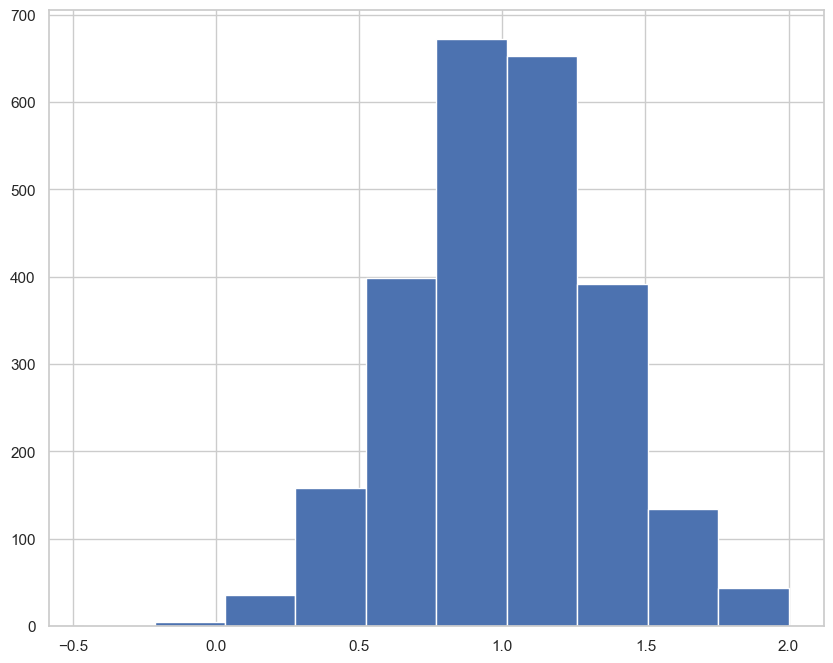

In [79]:


plt.figure(figsize=(10, 8))
plt.hist(df['Spindle_Vibration(µm)'])


<Axes: ylabel='Spindle_Vibration(µm)'>

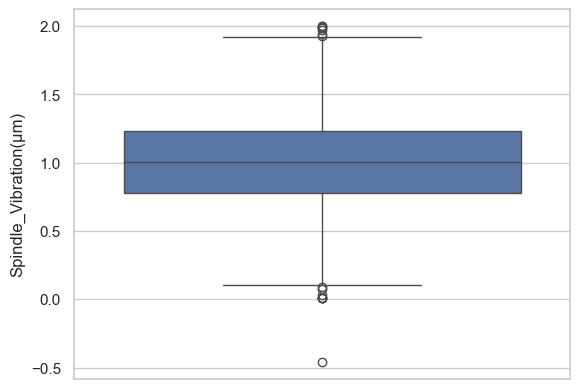

In [80]:
# Box plot for the column 'Spindle_Speed(RPM)'
plt.size=(10, 8)
sns.boxplot(data=df['Spindle_Vibration(µm)'])


In [81]:
Q1 = df['Spindle_Vibration(µm)'].quantile(0.25)
Q3 = df['Spindle_Vibration(µm)'].quantile(0.75)
IQR = Q3 - Q1

outliers = df['Spindle_Vibration(µm)'][(df['Spindle_Vibration(µm)'] < (Q1 - 1.5 * IQR)) | (df['Spindle_Vibration(µm)'] > (Q3 + 1.5 * IQR))]
print(outliers)

75      2.000
99      0.010
222    -0.461
351     1.984
796     0.076
1217    0.010
1252    0.088
1414    1.929
1662    1.994
1670    0.033
1719    1.971
1873    2.000
1987    0.010
2328    1.942
2478    0.012
Name: Spindle_Vibration(µm), dtype: float64


In [82]:
df['Spindle_Vibration(µm)'].describe()

count    2489.000000
mean        1.009334
std         0.342898
min        -0.461000
25%         0.777000
50%         1.008000
75%         1.236000
max         2.000000
Name: Spindle_Vibration(µm), dtype: float64

In [83]:
# The min value of the column 'Spindle_Vibration(µm)' need to be removed as it is not possible to have a negative value of the vibration
df['Spindle_Vibration(µm)'].min()

-0.461

In [84]:
# Removing the negative value from the column 'Spindle_Vibration(µm)'
df.drop(df[df['Spindle_Vibration(µm)'] == -0.461000].index, inplace=True)


In [85]:
# Null values in the column 'Spindle_Vibration(µm)'
df['Spindle_Vibration(µm)'].isnull().sum()

11

In [86]:
# impute the missing values in the column 'Spindle_Vibration(µm)' with the mean value of the column
df.fillna(df['Spindle_Vibration(µm)'].mean(), inplace=True)

(array([ 19.,  80., 198., 394., 543., 549., 405., 191.,  92.,  28.]),
 array([0.01 , 0.209, 0.408, 0.607, 0.806, 1.005, 1.204, 1.403, 1.602,
        1.801, 2.   ]),
 <BarContainer object of 10 artists>)

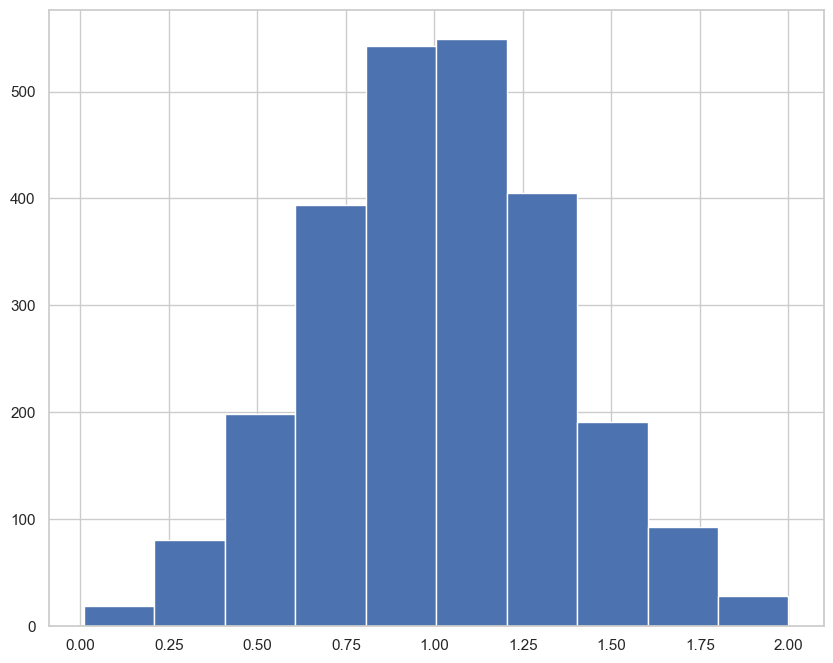

In [87]:
plt.figure(figsize=(10, 8))
plt.hist(df['Spindle_Vibration(µm)'])

# 20- Coolant_Temperature:


The minimum temperature is `10.4°C`, which is relatively low for a coolant temperature. Investigate whether this value is within the valid range for coolant temperature. The maximum value of 98.2°C is also relatively high and should be validated.

In [88]:
df.columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime'],
      dtype='object')

In [89]:
df['Coolant_Temperature'].describe()

count    2499.000000
mean       18.479559
std         8.619228
min         1.009925
25%        10.200000
50%        21.100000
75%        25.600000
max        98.200000
Name: Coolant_Temperature, dtype: float64

In [90]:
df['Coolant_Temperature'].sort_values(ascending=False).max()

98.2

In [91]:
df['Coolant_Temperature'].value_counts().sort_values(ascending=False).head(10)

Coolant_Temperature
26.4    83
25.6    82
27.0    72
6.8     71
24.4    70
29.8    70
30.3    69
28.7    68
4.5     68
11.9    67
Name: count, dtype: int64

In [92]:
df['Coolant_Temperature'].value_counts().get(98.2)


1

<Axes: xlabel='Coolant_Temperature'>

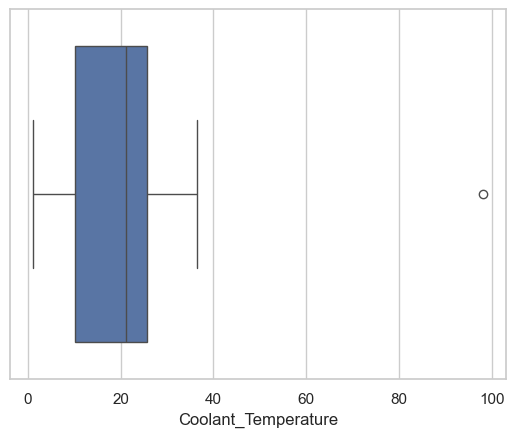

In [93]:
figsize=(10, 8)
sns.boxplot(x=df['Coolant_Temperature'])


(array([7.080e+02, 4.680e+02, 1.202e+03, 1.200e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1.00992524, 10.72893272, 20.44794019, 30.16694767, 39.88595514,
        49.60496262, 59.3239701 , 69.04297757, 78.76198505, 88.48099252,
        98.2       ]),
 <BarContainer object of 10 artists>)

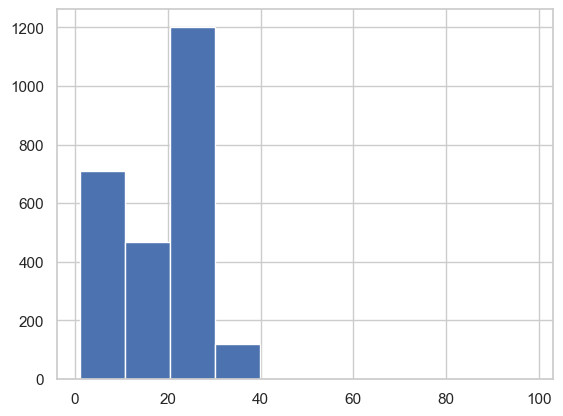

In [94]:
# ploting a histogram for the column 'Coolant_Temperature'
figsize=(10, 8)
plt.hist(df['Coolant_Temperature'])

In [95]:
Q1 = df['Coolant_Temperature'].quantile(0.25)
Q3 = df['Coolant_Temperature'].quantile(0.75)
IQR = Q3 - Q1

outliers = df['Coolant_Temperature'][(df['Coolant_Temperature'] < (Q1 - 1.5 * IQR)) | (df['Coolant_Temperature'] > (Q3 + 1.5 * IQR))]
print(outliers)

1035    98.2
Name: Coolant_Temperature, dtype: float64


In [96]:
df['Coolant_Temperature'].isnull().sum()

0

In [97]:
#  remove the outliers in the column 'Coolant_Temperature' with the mean value of the column
df.drop(df[df['Coolant_Temperature'] == 98.2].index, inplace=True)

<Axes: xlabel='Coolant_Temperature'>

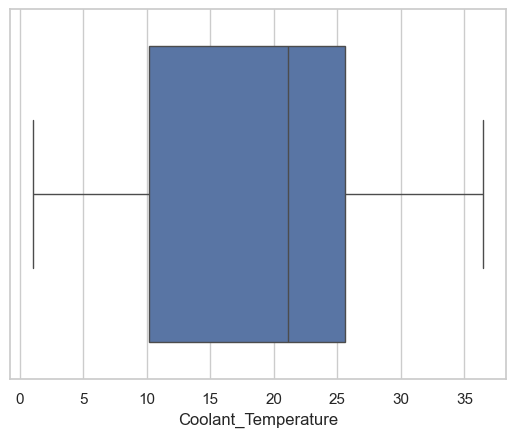

In [98]:
figsize=(10, 8)
sns.boxplot(x=df['Coolant_Temperature'])

In [99]:
df.columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime'],
      dtype='object')

In [100]:
# change the column 'Coolant_Temperature' to Coolant_Temperature(°C)
df.rename(columns={'Coolant_Temperature': 'Coolant_Temperature(°C)'}, inplace=True)

# 21- Fixing the Date Column

### Observation 1:
    - The column name DATE need to be checked and change the data type to `datetime`

In [101]:
# changing the datatype of the column 'Date' from object to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [102]:
df['Date'].dtype

dtype('<M8[ns]')

In [103]:
df['Date'].head(2)

0   2021-12-31
1   2021-12-31
Name: Date, dtype: datetime64[ns]

In [104]:
df['Date'].nunique()

164

In [105]:
df['Date'].isnull().sum()
# Chehcikng the number of null values in the column 'Date'

0

In [106]:
df['Date'].value_counts()
# Checking the value counts of each date in the column 'Date'

Date
2022-03-15    64
2022-03-19    48
2022-03-22    48
2022-03-23    40
2022-04-02    40
2022-03-13    39
2022-03-08    37
2022-03-01    37
2022-03-11    37
2022-04-05    37
2022-03-14    36
2022-03-10    36
2022-03-25    35
2022-03-02    34
2022-03-28    34
2022-03-12    34
2022-03-17    33
2022-03-06    32
2022-02-22    32
2022-03-04    32
2022-03-05    31
2022-02-24    31
2022-03-27    30
2022-04-04    30
2022-03-03    30
2022-03-31    30
2022-03-20    30
2022-04-07    29
2022-03-29    29
2022-03-21    29
2022-03-30    29
2022-03-09    28
2022-04-06    28
2022-02-23    28
2022-03-24    27
2022-02-27    27
2022-02-21    27
2022-02-28    27
2022-02-17    27
2022-02-14    26
2022-03-18    26
2022-03-07    26
2022-02-20    25
2022-02-25    25
2022-02-18    24
2022-03-16    24
2022-04-13    24
2022-03-26    23
2022-02-11    22
2022-04-10    22
2022-04-16    22
2022-04-03    22
2022-02-15    21
2022-02-10    21
2022-02-06    21
2022-04-01    20
2022-02-12    20
2022-04-11    20
2022-02-1

In [107]:
df['Date'].value_counts().sum()
# Checking the total number of values in the column 'Date' 

2498

In [108]:
df['Date'].dt.year.value_counts()
# Checking the value counts of each year in the column 'Date' by year

Date
2022    2473
2021      25
Name: count, dtype: int64

In [109]:
df['Date'].dt.year.value_counts().sum()
# Checking the total number of values in the column 'Date'

2498

In [110]:
df['Date'].dt.month.value_counts()
# Checking the value counts of each month in the column 'Date' by Month

Date
3     1048
2      595
4      527
1      178
5      116
12      24
6        8
11       1
7        1
Name: count, dtype: int64

In [111]:
df['Date'].dt.month.value_counts().sum()   
# Checking the total number of values in the column 'Date' by Month

2498

In [112]:
df['Date'].dt.day.value_counts()
# Checking the value counts of each day in the column 'Date'

Date
15    107
22    106
6      95
19     94
10     90
13     90
14     89
5      89
4      88
2      87
7      86
25     86
28     86
11     86
1      86
23     83
12     83
24     82
17     82
27     81
21     79
3      74
16     74
20     73
8      72
18     72
9      68
30     60
26     57
29     49
31     44
Name: count, dtype: int64

In [113]:
df['Date'].dt.day.value_counts().sum()
# Checking the total number of values in the column 'Date'by day

2498

In [114]:
df['Date'].dt.to_period('M').value_counts().sort_values(ascending=False)

# Extracting/ Grouping the year along with month from the column 'Date' and storing it 


Date
2022-03    1048
2022-02     595
2022-04     527
2022-01     178
2022-05     116
2021-12      24
2022-06       8
2021-11       1
2022-07       1
Freq: M, Name: count, dtype: int64

### Finding in `Date` column:
- There is `no null value` for date `column`
- A totall of `2500` rows in the column. Checked by date, month and year individualy.
- A totall of `2500` rows in the column. Check
- The Highest entries is for the year `2022` i.e `2475`
- The lowest entries is for the month was for the month of `March` in the year of `2022`
- The lowest entries is for the month was for the month of `July` in the year of `2022`
- For years `2021` there was two working months i.e `november` and `december`

### Changes In `Date` column:
- The datatype is changes in `Date` column from `object` to `datetime`.

In [115]:
# Chehcking the unique values in each column
df.nunique().sort_values(ascending=False)

Air_System_Pressure(bar)           2471
Tool_Vibration(µm)                 2349
Hydraulic_Pressure(bar)            1976
Coolant_Pressure(bar)              1625
Torque(Nm)                         1327
Spindle_Speed(RPM)                 1181
Spindle_Vibration(µm)              1144
Coolant_Temperature(°C)             275
Voltage(volts)                      239
Hydraulic_Oil_Temperature(°C)       210
Spindle_Bearing_Temperature(°C)     205
Cutting(kN)                         170
Date                                164
Machine_ID                            3
Assembly_Line_No                      3
Downtime                              2
dtype: int64

# 22-  Fixing The `Machine_id` column

### Observation : 2
- It seem that there are `3` different machines as column names `Machine_ID` showing `3` valuses.
- Also there seems to have `3` differrent assembly line as `Assembly_Line_No` showing `3` values.
- `Air_System_Pressure(bar)` coulms and `Tool_Vibration(µm)` have most unique values `2472` and `2350` respectively, that show they are most values which are variable .
- `Downtime` column seems like a `boolean` column have just two dtype of values

### Exploring the data from the column `Machine_ID`

In [116]:
df['Machine_ID'].value_counts()
# Checking the count of each unique value in the column

Machine_ID
Makino-L1-Unit1-2013    874
Makino-L3-Unit1-2015    818
Makino-L2-Unit1-2015    806
Name: count, dtype: int64

In [117]:
df['Machine_ID'].value_counts().sum()
# Sum of all the unique values in the column

2498

In [118]:
df['Machine_ID'].isnull().sum()
# Checking the number of null values in the column

0

In [119]:
df['Machine_ID'].dtypes

dtype('O')

### Finding from the column `Machine_ID`
- column name 'Machine_ID' has three unique values:
  - Makino-L1-Unit1-2013    874
  - Makino-L3-Unit1-2015    818
  - Makino-L2-Unit1-2015    808
- A total of 2500 rows of data.
- No `NaN` values are present in the column.
- The data type is `object`.
- No need to search for `duplicate` values in the column table as the number of `unique` values is equal to the `rows` in the dataset

# 23- Exploring the data from the column `Assembly_Line_No`

In [120]:
df['Assembly_Line_No'].value_counts()

Assembly_Line_No
Shopfloor-L1    874
Shopfloor-L3    818
Shopfloor-L2    806
Name: count, dtype: int64

In [121]:
df['Assembly_Line_No'].value_counts().sum()

2498

In [122]:
df['Assembly_Line_No'].isnull().sum()

0

In [123]:
df['Assembly_Line_No'].dtype

dtype('O')

### Findings from the column `Assembly_Line_No`
- The column has three valuses:
  - Shopfloor-L1    874
  - Shopfloor-L3    818
  - Shopfloor-L2    808
- A total of `2500` rows in the column table.
- There is no `NaN` values in the column table
- The dat type is `object`
- No need to search for `duplicate` values in the column table as the number of `unique` values is equal to the `rows` in the dataset

# 24- Exploring the data from the column `Downtime`

In [124]:
df['Downtime']

0          Machine_Failure
1          Machine_Failure
2          Machine_Failure
3          Machine_Failure
4          Machine_Failure
5          Machine_Failure
6          Machine_Failure
7       No_Machine_Failure
8       No_Machine_Failure
9          Machine_Failure
10         Machine_Failure
11         Machine_Failure
12         Machine_Failure
13         Machine_Failure
14         Machine_Failure
15         Machine_Failure
16         Machine_Failure
17         Machine_Failure
18         Machine_Failure
19         Machine_Failure
20         Machine_Failure
21      No_Machine_Failure
22         Machine_Failure
23      No_Machine_Failure
24      No_Machine_Failure
25      No_Machine_Failure
26         Machine_Failure
27      No_Machine_Failure
28         Machine_Failure
29      No_Machine_Failure
30      No_Machine_Failure
31      No_Machine_Failure
32      No_Machine_Failure
33         Machine_Failure
34         Machine_Failure
35         Machine_Failure
36      No_Machine_Failure
3

In [125]:
df['Downtime'].nunique()

2

In [126]:
df['Downtime'].value_counts()

Downtime
Machine_Failure       1265
No_Machine_Failure    1233
Name: count, dtype: int64

In [127]:
df['Downtime'].value_counts().sum()

2498

In [128]:
df['Downtime'].dtype

dtype('O')

In [129]:
df['Downtime'] = df['Downtime'].map({'No_Machine_Failure': False, 'Machine_Failure': True})

In [130]:
df['Downtime'] = df['Downtime'].astype('bool')

In [131]:
df['Downtime'].value_counts()

Downtime
True     1265
False    1233
Name: count, dtype: int64

### Changes in the column `Downtime`:
- The column `Downtime` has two values . So i decided to change it into boolean datatypes
- Entry `Machine_Failure`  is changed into an entry `True`.
- Entry `No_Machine_Failure` is changed into an entry `False`
- So, in column `Downtime` the `True = Machine_Failure`    and  `False = No_Machine_Failure`

In [132]:
df.head(2)

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature(°C),Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,True
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,True


In [133]:
# Saving the cleaned dataset in a csv file
pd.DataFrame(df).to_csv('cleaned_machine_downtime.csv', index=False)